# Car Cooperators Insurance Prediction

In this DATA*6100 Project we will be performing classification task on the dataset provided.The primary goal is to predict whether the customer will buy insurance or not.The column we are predicting is "ISBOUND" which means whether or not the person who asked for the quote actually took out the insurance policy (1 means insurance is taken and 0 means not taken).

# Importing Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Training and Testing data

We are given two datasets named :


1.   Project 2 training data
2.   Project 2 test data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Project2_Training.xlsx to Project2_Training (3).xlsx


In [ ]:
df_train = pd.read_excel('Project2_Training.xlsx')
df_train

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,NaN,Owned,3000.0,...,10.0,No,Married,Trades,0,0,0,0,0,0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,NaN,Owned,1.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101886,2016-12-30,2000,SATURN,LS1 4DR,20000.0,20.0,NaN,NaN,NaN,20000.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0
101887,2016-12-30,2004,HONDA,CIVIC EX 4DR,10000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
101888,2016-12-30,2011,KIA TRUCK/VAN,RIO,15000.0,9.0,NaN,NaN,NaN,28000.0,...,NaN,No,Single,Professional/Social,0,0,0,0,0,0
101889,2016-12-30,2005,PONTIAC,SUNFIRE SL 4DR,10000.0,30.0,NaN,NaN,NaN,500.0,...,NaN,No,Married,Not Known,0,0,0,0,0,1


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Project2_Test.xlsx to Project2_Test (3).xlsx


In [ ]:
df_test = pd.read_excel('Project2_Test.xlsx')
df_test

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUALKM,COMMUTEDISTANCE,MARKINGSYSTEM,TRACKINGSYSTEM,VEHICLEOWNERSHIP,VEHICLEVALUE,...,YEARSLICENSED,YEARSASPRINCIPALDRIVER,MULTIPRODUCT,MARITALSTATUS,OCCUPATION,CONVICTIONCOUNTMINOR3YRS,CONVICTIONCOUNTMAJOR3YRS,CONVICTIONCOUNTCRIMINAL3YRS,ASSIGNEDLOSSESPD5YRS,SUSPENSIONCOUNT
0,2017-01-03,2002,HONDA,CIVIC EX 2DR COUPE [U.S. MODEL],10000,4.0,NaN,NaN,NaN,NaN,...,7.0,NaN,No,Single,Not Known,0,0,0,0,0
1,2017-01-04,2010,FORD TRUCK/VAN,F150 XLT SUPERCREW 4WD,10000,10.0,NaN,NaN,NaN,NaN,...,13.0,NaN,Yes,Single,Not Known,0,0,0,0,0
2,2017-01-04,2017,DODGE/RAM TRUCK/VAN,RAM 1500 REBEL CREW CAB 4WD,9000,3.0,NaN,NaN,Owned,72000.0,...,33.0,NaN,Yes,Single,Not Known,0,0,0,0,0
3,2017-01-04,2013,DODGE/RAM TRUCK/VAN,RAM 1500 SPORT CREW CAB 4WD,10000,10.0,NaN,NaN,NaN,55000.0,...,9.0,NaN,No,Single,Not Known,0,0,0,0,0
4,2017-01-04,2014,FORD,FOCUS SE 4DR,20000,10.0,NaN,NaN,NaN,NaN,...,4.0,NaN,No,Single,Student,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15109,2017-02-27,2012,HONDA,CIVIC DX 4DR,20000,16.0,NaN,NaN,NaN,NaN,...,9.0,NaN,Yes,Single,Not Known,0,0,0,0,0
15110,2017-02-27,2011,BMW,323i 4DR,10000,8.0,NaN,NaN,NaN,12418.0,...,27.0,NaN,Yes,Married,Not Known,0,0,0,0,0
15111,2017-02-27,2007,HONDA TRUCK/VAN,ODYSSEY LX,15000,5.0,NaN,NaN,NaN,NaN,...,32.0,NaN,Yes,Married,Not Known,0,0,0,0,0
15112,2017-02-27,2014,HONDA TRUCK/VAN,CRV,12000,13.0,NaN,NaN,NaN,35000.0,...,9.0,NaN,Yes,Single,Not Known,0,0,0,0,0


# Data Pre - Processing

We will perform data pre processing seperately on both training and testing datasets and then combine them together for feature engineering

## Standardizing "VEHICLE_MAKE" column

This column gives information about the brand of the car and upon careful observation we can see there are various errors in the name. The code works in the following way.



*   We start cleaning them by making a dictonary storing inside regex pattern to capture multiple variations of a make.
*   Iterate over each value pair and combine them with OR (|) operator to create a single regex.
*   Now for each row it checks if the value matches any pattern. If yes then replace that value with the corresponding key for that pattern.

We will do this seperately for both the train and test dataset and then combine them for further preprocessing because we found out that after combining the datasets the two words is eliminated and the code wont work for it.


In [ ]:
# Display unique makes to confirm changes
df_train['VEHICLEMAKE'].unique()

array(['VOLKSWAGEN', 'HYUNDAI', 'CHEVROLET TRUCK/VAN', 'TOYOTA', 'HONDA',
       'PONTIAC TRUCK/VAN', 'KIA TRUCK/VAN', 'SMART', 'MAZDA',
       'HONDA TRUCK/VAN', 'BUICK TRUCK/VAN', 'CHEVROLET',
       'FORD TRUCK/VAN', 'TOYOTA TRUCK/VAN', 'LINCOLN TRUCK/VAN',
       'DODGE/RAM TRUCK/VAN', 'NISSAN', 'JEEP', 'MERCEDES-BENZ',
       'PONTIAC', 'INFINITI TRUCK/VAN', 'FORD', 'KIA', 'CHRYSLER', 'MINI',
       'SUBARU', 'ACURA', 'BMW TRUCK/VAN', 'GMC TRUCK/VAN', 'VOLVO',
       'BUICK', 'VOLKSWAGEN TRUCK/VAN', 'HYUNDAI TRUCK/VAN',
       'MERCURY TRUCK/VAN', 'NISSAN TRUCK/VAN', 'PORSCHE', 'BMW',
       'MAZDA TRUCK/VAN', 'LAND ROVER', 'DODGE', 'LEXUS TRUCK/VAN',
       'AUDI TRUCK/VAN', 'CADILLAC', 'SUZUKI', 'MERCEDES-BENZ TRUCK',
       'SATURN', 'BENTLEY', 'LEXUS', 'VOLVO TRUCK/VAN', 'SAAB', 'LINCOLN',
       'OLDSMOBILE', 'MITSUBISHI', 'AUDI', 'INFINITI',
       'MITSUBISHI TRUCK/VAN', 'MAZDA3', 'FIAT', 'JAGUAR TRUCK/VAN',
       'CHRYSLER TRUCK/VAN', 'SCION', 'SATURN TRUCK/VAN', 'JAGUAR'

In [ ]:
# Create dictonary of patterns
make_patterns = {
    'TRUCK/VAN': [
        r'\bCHEVROLET TRUCK/VAN\b.*', r'\bFORD TRUCK/VAN\b.*', r'\bTOYOTA TRUCK/VAN\b.*', r'\bHONDA TRUCK/VAN\b.*',
        r'\bPONTIAC TRUCK/VAN\b.*', r'\bKIA TRUCK/VAN\b.*', r'\bBUICK TRUCK/VAN\b.*', r'\bLINCOLN TRUCK/VAN\b.*',
        r'\bDODGE/RAM TRUCK/VAN\b.*', r'\bINFINITI TRUCK/VAN\b.*', r'\bBMW TRUCK/VAN\b.*', r'\bGMC TRUCK/VAN\b.*',
        r'\bVOLKSWAGEN TRUCK/VAN\b.*', r'\bHYUNDAI TRUCK/VAN\b.*', r'\bMERCURY TRUCK/VAN\b.*', r'\bNISSAN TRUCK/VAN\b.*',
        r'\bMAZDA TRUCK/VAN\b.*', r'\bLEXUS TRUCK/VAN\b.*', r'\bAUDI TRUCK/VAN\b.*', r'\bMERCEDES-BENZ TRUCK\b.*',
        r'\bVOLVO TRUCK/VAN\b.*', r'\bJAGUAR TRUCK/VAN\b.*', r'\bCHRYSLER TRUCK/VAN\b.*', r'\bSATURN TRUCK/VAN\b.*',
        r'\bSUZUKI TRUCK/VAN\b.*', r'\bCADILLAC TRUCK/VAN\b.*', r'\bPORSCHE TRUCK/VAN\b.*', r'\bOLDSMOBILE TRUCK/VAN\b.*',
        r'\bSUBARU TRUCK/VAN\b.*', r'\bGMC CAMION/VAN\b.*', r'\bDODGE/RAM CAMION/VAN\b.*', r'\bISUZU TRUCK/VAN\b.*',
        r'\bGEO TRUCK/VAN\b.*', r'\bTESLA TRUCK/VAN\b.*', r'\bBENTLEY TRUCK/VAN\b.*', r'\bTOYOTA CAMION/VAN\b.*',
        r'\bHONDA CAMION/VAN\b.*', r'\bMAZDA CAMION/VAN\b.*', r'\bVOLKSWAGEN CAMION/VA\b.*', r'\bKIA CAMION/VAN\b.*',
        r'\bPLYMOUTH TRUCK/VAN\b.*', r'\bPORSCHE CAMION/VAN\b.*', r'\bCHEVROLET CAMION/VAN\b.*', r'\bNISSAN CAMION/VAN\b.*',
        r'\bFREIGHTLINER\b.*', r'\bHYUNDAI CAMION/VAN\b.*', r'\bSAAB TRUCK/VAN\b.*', r'\bFORD CAMION/VAN\b.*',
        r'\bMITSUBISHI CAMION/VA\b.*', r'\bCADILLAC CAMION/VAN\b.*', r'\bPONTIAC CAMION/VAN\b.*', r'\bBMW CAMION/VAN\b.*',
        r'\bACURA TRUCK/VAN\b.*', r'\bLEXUS CAMION/VAN\b.*', r'\bSATURN CAMION/VAN\b.*'],


    'FORD': [r'\bFORD\b.*', r'\bF150\b.*', r'\bF250\b.*', r'\bE350\b.*', r'\bMUSTANG\b.*', r'\bSHELBY\b.*', r'\bRANGER\b.*'],
    'CHEVROLET': [r'\bCHEV\b.*', r'\bCHEVROLET\b.*', r'\bCHEVROELT\b.*', r'\bCHEVRELOT\b.*', r'\bCHERVOLET\b.*',
                  r'\bCEVROLET\b.*', r'\bCHCVIOE\b.*', r'\bASTRO\b.*', r'\bCHEVROLE\b.*', r'\bZ28\b.*', r'\bCHEVY\b.*',
                  r'\bCORVETTE\b.*', r'\bCHEVROLER\b.*', r'\bEL CAMINO\b.*', r'\bMAILBOU\b.*',r'\bCHEVROLET\w*'],
'VOLKSWAGEN': [r'\bWV\b.*', r'\bVOLKSWAGEN\b.*', r'\bVOLKSWAGON\b.*', r'\bVOLGSWAGEN\b.*', r'\bVOLSWAGEN\b.*',
               r'\bVW\b.*', r'\bPASSAT\b.*', r'\bJETTA\b.*', r'\bVOLKSWAGENJAVASCRIPT:VOID\(\0\)\b.*', r'\bVOLLKS\b.*', r'\bVOLKS\b.*', r'\bVOLKSWAGENJAVASCRIPT:VOID\(0\)\b.*'],
    'HYUNDAI': [r'\bHYUNDAI\b.*', r'\bHUNDAY\b.*', r'\bHYNDAI\b.*', r'\bHYNDEI\b.*', r'\bELANTRA\b.*', r'\bHYUANDAI\b.*', r'\bHUNDAI\b.*',r'\bHYUNDIA\b'],
    'TOYOTA': [r'\bTOYOTA\b.*', r'\bTOYOATA\b.*', r'\bTOTOTA\b.*', r'\bTOYTO\b.*', r'\bMATRIX\b.*', r'\bSCION\b.*',
               r'\bCORROLLA\b.*', r'\bCOROLLA\b.*', r'\bCAMRY\b.*', r'\bCELICA\b.*', r'\bTOYOTO\b.*'],
    'HONDA': [r'\bHONDA\b.*', r'\bHONODA\b.*', r'\bCIVIC\b.*'],
    'PONTIAC': [r'\bPONTIAC\b.*', r'\bPONTIIAC\b.*', r'\bPOTIAC\b.*', r'\bMONTANA\b.*', r'\bPONITAC\b.*'],
    'KIA': [r'\bKIA\b.*'],
    'SMART': [r'\bSMART\b.*'],
    'MAZDA': [r'\bMAZDA\b.*', r'\bMADZA\b.*', r'\bMAZDS\b.*', r'\bMAZDA3\b.*'],
    'BUICK': [r'\bBUICK\b.*'],
    'LINCOLN': [r'\bLINCOLN\b.*'],
    'DODGE': [r'\bDODGE\b.*', r'\bRAM\b.*', r'\bDODGE RAM\b.*', r'\bCHALLENGER\b.*', r'\bDOGDE\b.*', r'\bDODDGE\b.*', r'\bGRAND\b.*'],
    'NISSAN': [r'\bNISSAN\b.*', r'\bNISAN\b.*', r'\bNISSIAN\b.*', r'\bNISSSAN\b.*', r'\bALTIMA\b.*', r'\b2XXXXXXXXXXXXXXXXXX\b.*', r'\bNISASN\b.*'],
    'JEEP': [r'\bJEEP\b.*', r'\bJEPP\b.*'],
    'MERCEDES-BENZ': [r'\bMERCEDES[-\s]?BENZ\b.*', r'\bMECEDEZ\b.*', r'\bMERCEDEZ\b.*', r'\bMERCEDES\b.*', r'\bMERZ\b.*'],
    'INFINITI': [r'\bINFINITI\b.*', r'\bINFINTI\b.*'],
    'CHRYSLER': [r'\bCHRYSLER\b.*', r'\bCRYSLER\b.*', r'\bCHRYLSER\b.*', r'\bCHRSYLER\b.*'],
    'MINI': [r'\bMINI\b.*'],
    'SUBARU': [r'\bSUBARU\b.*'],
    'ACURA': [r'\bACURA\b.*'],
    'BMW': [r'\bBMW\b.*'],
    'GMC': [r'\bGMC\b.*', r'\bSIERRA\b.*'],
    'VOLVO': [r'\bVOLVO\b.*'],
    'MERCURY': [r'\bMERCURY\b.*'],
    'PORSCHE': [r'\bPORSCHE\b.*', r'\bPROSCHE\b.*', r'\bPORCHE\b.*'],
    'LAND ROVER': [r'\bLAND ROVER\b.*', r'\bRANGE ROVER\b.*', r'\bLANDROVER\b.*', r'\bROVER\b.*'],
    'LEXUS': [r'\bLEXUS\b.*'],
    'AUDI': [r'\bAUDI\b.*'],
    'CADILLAC': [r'\bCADILLAC\b.*'],
    'SUZUKI': [r'\bSUZUKI\b.*', r'\bSPRINT\b.*'],
    'SATURN': [r'\bSATURN\b.*', r'\bVUE\b.*'],
    'BENTLEY': [r'\bBENTLEY\b.*'],
    'SAAB': [r'\bSAAB\b.*'],
    'OLDSMOBILE': [r'\bOLDSMOBILE\b.*', r'\bCUTLASS\b.*'],
    'MITSUBISHI': [r'\bMITSUBISHI\b.*', r'\bMITIBUSHI\b.*'],
    'FIAT': [r'\bFIAT\b.*'],
    'JAGUAR': [r'\bJAGUAR\b.*'],
    'ISUZU': [r'\bISUZU\b.*'],
    'YAMAHA': [r'\bYAMAHA\b.*'],
    'TESLA': [r'\bTESLA\b.*'],
    'PLYMOUTH': [r'\bPLYMOUTH\b.*', r'\bPLYMONTH\b.*'],
    'LAMBORGHINI': [r'\bLAMBORGHINI\b.*', r'\bDIABLO\b.*'],
    'KENWORTH': [r'\bKENWORTH\b.*'],
    'HINO': [r'\bHINO\b.*'],
    'HUMMER': [r'\bHUMMER\b.*'],
    'FREIGHTLINER': [r'\bFREIGHTLINER\b.*'],
    'FERRARI': [r'\bFERRARI\b.*'],
    'TRIUMPH': [r'\bTRIUMPH\b.*', r'\bTRIU\b.*'],
    'ASTON MARTIN': [r'\bASTON MARTIN\b.*'],
    'ROLLS ROYCE': [r'\bROLLS ROYCE\b.*'],
    'GEO': [r'\bGEO\b.*'],
    'HARLEY DAVIDSON': [r'\bHARILEY DAVIDSON\b.*', r'\bSTREET GLIDE SPECIAL\b.*', r'\bHARLEY\b.*'],
    'ARCTIC CAT': [r'\bARCTIC CAT\b.*', r'\bARTIC CAT\b.*', r'\bARTCIT CAT\b.*'],
    'BOMBARDIER': [r'\bBOMBARDIER\b.*', r'\bBOMBADIER\b.*'],
    'FOREST RIVER': [r'\bFOREST RIVER\b.*', r'\bFOREST\b.*'],
    'TRAIL LITE': [r'\bTRAIALLITE\b.*', r'\bTRAIL LIGHT\b.*', r'\bTRAILLITE\b.*'],
    'UNKNOWN': [r'\b1FTFW1EF8BFA01523\b.*', r'\bUNDISCLOSED\b.*', r'\bTRAVEL\b.*', r'\bCONVERTED\b.*',r'\bMONICO\b',r'\bCAR\b',r'\bKABUTO\b'],
    'ALFA ROMEO': [r'\bALFA ROMEO\b.*', r'\bALFA\b.*'],
    'MG': [r'\bMG\b.*', r'\bMGB\b.*', r'\bMGA\b.*'],
    'DIAHATSU': [r'\bDIHATSU\b.*'],
    'SKIDOO': [r'\bSKIDOO\b.*', r'\bSKI-DOO\b.*'],
    'MASERATI': [r'\bMASERATI\b.*', r'\bMAZERATI\b.*'],

}
# Apply patterns to standardize the 'VEHICLEMAKE' column
for make, patterns in make_patterns.items():
    combined_pattern = '|'.join(patterns)
    df_train['VEHICLEMAKE'] = df_train['VEHICLEMAKE'].str.replace(combined_pattern, make, regex=True)
# Display transformed values
df_train['VEHICLEMAKE'].unique()

array(['VOLKSWAGEN', 'HYUNDAI', 'TRUCK/VAN', 'TOYOTA', 'HONDA', 'SMART',
       'MAZDA', 'CHEVROLET', 'NISSAN', 'JEEP', 'MERCEDES-BENZ', 'PONTIAC',
       'FORD', 'KIA', 'CHRYSLER', 'MINI', 'SUBARU', 'ACURA', 'VOLVO',
       'BUICK', 'PORSCHE', 'BMW', 'LAND ROVER', 'DODGE', 'CADILLAC',
       'SUZUKI', 'SATURN', 'BENTLEY', 'LEXUS', 'SAAB', 'LINCOLN',
       'OLDSMOBILE', 'MITSUBISHI', 'AUDI', 'INFINITI', 'FIAT', 'JAGUAR',
       'MERCURY', 'LADA', 'MASERATI', 'UNKNOWN', 'YAMAHA', 'PLYMOUTH',
       'GMC', 'TESLA', 'LAMBORGHINI', 'KENWORTH', 'HINO', 'HUMMER',
       'CHYRSLER', 'ALFA ROMEO', 'PONTAIC', 'FERRARI', 'TRIUMPH',
       'ARCTIC CAT', 'COACHMEN', 'AMERICAN MOTORS', 'MOBILITY VENTURES',
       'GEO', 'ASTON MARTIN', 'EAGLE', 'BRICKLIN', 'FOREST RIVER',
       'RYMCO', 'ACCURA', 'INTERNATIONAL', 'ROLLS ROYCE',
       'HARLEY DAVIDSON', 'SCOOTTERRE', 'MG', 'TRIPLE E', 'KTM',
       'MCLAREN', 'AUSTIN-HEALEY', 'BLUE BIRD CORP', 'SKIDOO', 'AMC',
       'HIGH COUNTRY', 'ROADTREK', '

In [ ]:
# Display unique makes to confirm changes
df_test['VEHICLEMAKE'].unique()

array(['HONDA', 'FORD TRUCK/VAN', 'DODGE/RAM TRUCK/VAN', 'FORD',
       'CHEVROLET TRUCK/VAN', 'GMC TRUCK/VAN', 'BMW TRUCK/VAN', 'ACURA',
       'TOYOTA', 'TOYOTA TRUCK/VAN', 'CHRYSLER', 'KIA', 'MAZDA TRUCK/VAN',
       'CHEVROLET', 'MAZDA', 'NISSAN TRUCK/VAN', 'MITSUBISHI',
       'HYUNDAI TRUCK/VAN', 'PONTIAC', 'KIA TRUCK/VAN', 'NISSAN',
       'LEXUS TRUCK/VAN', 'MERCEDES-BENZ TRUCK', 'VOLKSWAGEN TRUCK/VAN',
       'BUICK', 'VOLKSWAGEN', 'VOLVO', 'MERCEDES-BENZ', 'HONDA TRUCK/VAN',
       'HYUNDAI', 'BMW', 'INFINITI TRUCK/VAN', 'CADILLAC TRUCK/VAN',
       'JEEP', 'HYUNDAI CAMION/VAN', 'MITSUBISHI TRUCK/VAN',
       'BUICK TRUCK/VAN', 'SUBARU', 'FORD CAMION/VAN', 'MERZ',
       'LINCOLN TRUCK/VAN', 'CHRYSLER TRUCK/VAN', 'DODGE',
       'PONTIAC TRUCK/VAN', 'LEXUS', 'MERCURY', 'SATURN TRUCK/VAN',
       'OLDSMOBILE', 'AUDI', 'PORSCHE TRUCK/VAN', 'MASERATI', 'CADILLAC',
       'VOLVO TRUCK/VAN', 'AUDI TRUCK/VAN', 'MINI', 'LAND ROVER',
       'ACURA TRUCK/VAN', 'LEXUS CAMION/VAN', 'INF

In [ ]:
# Create dictonary of patterns
make_patterns = {
    'TRUCK/VAN': [
        r'\bCHEVROLET TRUCK/VAN\b.*', r'\bFORD TRUCK/VAN\b.*', r'\bTOYOTA TRUCK/VAN\b.*', r'\bHONDA TRUCK/VAN\b.*',
        r'\bPONTIAC TRUCK/VAN\b.*', r'\bKIA TRUCK/VAN\b.*', r'\bBUICK TRUCK/VAN\b.*', r'\bLINCOLN TRUCK/VAN\b.*',
        r'\bDODGE/RAM TRUCK/VAN\b.*', r'\bINFINITI TRUCK/VAN\b.*', r'\bBMW TRUCK/VAN\b.*', r'\bGMC TRUCK/VAN\b.*',
        r'\bVOLKSWAGEN TRUCK/VAN\b.*', r'\bHYUNDAI TRUCK/VAN\b.*', r'\bMERCURY TRUCK/VAN\b.*', r'\bNISSAN TRUCK/VAN\b.*',
        r'\bMAZDA TRUCK/VAN\b.*', r'\bLEXUS TRUCK/VAN\b.*', r'\bAUDI TRUCK/VAN\b.*', r'\bMERCEDES-BENZ TRUCK\b.*',
        r'\bVOLVO TRUCK/VAN\b.*', r'\bJAGUAR TRUCK/VAN\b.*', r'\bCHRYSLER TRUCK/VAN\b.*', r'\bSATURN TRUCK/VAN\b.*',
        r'\bSUZUKI TRUCK/VAN\b.*', r'\bCADILLAC TRUCK/VAN\b.*', r'\bPORSCHE TRUCK/VAN\b.*', r'\bOLDSMOBILE TRUCK/VAN\b.*',
        r'\bSUBARU TRUCK/VAN\b.*', r'\bGMC CAMION/VAN\b.*', r'\bDODGE/RAM CAMION/VAN\b.*', r'\bISUZU TRUCK/VAN\b.*',
        r'\bGEO TRUCK/VAN\b.*', r'\bTESLA TRUCK/VAN\b.*', r'\bBENTLEY TRUCK/VAN\b.*', r'\bTOYOTA CAMION/VAN\b.*',
        r'\bHONDA CAMION/VAN\b.*', r'\bMAZDA CAMION/VAN\b.*', r'\bVOLKSWAGEN CAMION/VA\b.*', r'\bKIA CAMION/VAN\b.*',
        r'\bPLYMOUTH TRUCK/VAN\b.*', r'\bPORSCHE CAMION/VAN\b.*', r'\bCHEVROLET CAMION/VAN\b.*', r'\bNISSAN CAMION/VAN\b.*',
        r'\bFREIGHTLINER\b.*', r'\bHYUNDAI CAMION/VAN\b.*', r'\bSAAB TRUCK/VAN\b.*', r'\bFORD CAMION/VAN\b.*',
        r'\bMITSUBISHI CAMION/VA\b.*', r'\bCADILLAC CAMION/VAN\b.*', r'\bPONTIAC CAMION/VAN\b.*', r'\bBMW CAMION/VAN\b.*',
        r'\bACURA TRUCK/VAN\b.*', r'\bLEXUS CAMION/VAN\b.*', r'\bSATURN CAMION/VAN\b.*'],
    'FORD': [r'\bFORD\b.*', r'\bF150\b.*', r'\bF250\b.*', r'\bE350\b.*', r'\bMUSTANG\b.*', r'\bSHELBY\b.*', r'\bRANGER\b.*'],
    'CHEVROLET': [r'\bCHEV\b.*', r'\bCHEVROLET\b.*', r'\bCHEVROELT\b.*', r'\bCHEVRELOT\b.*', r'\bCHERVOLET\b.*',
                  r'\bCEVROLET\b.*', r'\bCHCVIOE\b.*', r'\bASTRO\b.*', r'\bCHEVROLE\b.*', r'\bZ28\b.*', r'\bCHEVY\b.*',
                  r'\bCORVETTE\b.*', r'\bCHEVROLER\b.*', r'\bEL CAMINO\b.*', r'\bMAILBOU\b.*',r'\bCHEVROLET\w*'],
'VOLKSWAGEN': [r'\bWV\b.*', r'\bVOLKSWAGEN\b.*', r'\bVOLKSWAGON\b.*', r'\bVOLGSWAGEN\b.*', r'\bVOLSWAGEN\b.*',
               r'\bVW\b.*', r'\bPASSAT\b.*', r'\bJETTA\b.*', r'\bVOLKSWAGENJAVASCRIPT:VOID\(\0\)\b.*', r'\bVOLLKS\b.*', r'\bVOLKS\b.*', r'\bVOLKSWAGENJAVASCRIPT:VOID\(0\)\b.*'],
    'HYUNDAI': [r'\bHYUNDAI\b.*', r'\bHUNDAY\b.*', r'\bHYNDAI\b.*', r'\bHYNDEI\b.*', r'\bELANTRA\b.*', r'\bHYUANDAI\b.*', r'\bHUNDAI\b.*',r'\bHYUNDIA\b'],
    'TOYOTA': [r'\bTOYOTA\b.*', r'\bTOYOATA\b.*', r'\bTOTOTA\b.*', r'\bTOYTO\b.*', r'\bMATRIX\b.*', r'\bSCION\b.*',
               r'\bCORROLLA\b.*', r'\bCOROLLA\b.*', r'\bCAMRY\b.*', r'\bCELICA\b.*', r'\bTOYOTO\b.*'],
    'HONDA': [r'\bHONDA\b.*', r'\bHONODA\b.*', r'\bCIVIC\b.*'],
    'PONTIAC': [r'\bPONTIAC\b.*', r'\bPONTIIAC\b.*', r'\bPOTIAC\b.*', r'\bMONTANA\b.*', r'\bPONITAC\b.*'],
    'KIA': [r'\bKIA\b.*'],
    'SMART': [r'\bSMART\b.*'],
    'MAZDA': [r'\bMAZDA\b.*', r'\bMADZA\b.*', r'\bMAZDS\b.*', r'\bMAZDA3\b.*'],
    'BUICK': [r'\bBUICK\b.*'],
    'LINCOLN': [r'\bLINCOLN\b.*'],
    'DODGE': [r'\bDODGE\b.*', r'\bRAM\b.*', r'\bDODGE RAM\b.*', r'\bCHALLENGER\b.*', r'\bDOGDE\b.*', r'\bDODDGE\b.*', r'\bGRAND\b.*'],
    'NISSAN': [r'\bNISSAN\b.*', r'\bNISAN\b.*', r'\bNISSIAN\b.*', r'\bNISSSAN\b.*', r'\bALTIMA\b.*', r'\b2XXXXXXXXXXXXXXXXXX\b.*', r'\bNISASN\b.*'],
    'JEEP': [r'\bJEEP\b.*', r'\bJEPP\b.*'],
    'MERCEDES-BENZ': [r'\bMERCEDES[-\s]?BENZ\b.*', r'\bMECEDEZ\b.*', r'\bMERCEDEZ\b.*', r'\bMERCEDES\b.*', r'\bMERZ\b.*'],
    'INFINITI': [r'\bINFINITI\b.*', r'\bINFINTI\b.*'],
    'CHRYSLER': [r'\bCHRYSLER\b.*', r'\bCRYSLER\b.*', r'\bCHRYLSER\b.*', r'\bCHRSYLER\b.*'],
    'MINI': [r'\bMINI\b.*'],
    'SUBARU': [r'\bSUBARU\b.*'],
    'ACURA': [r'\bACURA\b.*'],
    'BMW': [r'\bBMW\b.*'],
    'GMC': [r'\bGMC\b.*', r'\bSIERRA\b.*'],
    'VOLVO': [r'\bVOLVO\b.*'],
    'MERCURY': [r'\bMERCURY\b.*'],
    'PORSCHE': [r'\bPORSCHE\b.*', r'\bPROSCHE\b.*', r'\bPORCHE\b.*'],
    'LAND ROVER': [r'\bLAND ROVER\b.*', r'\bRANGE ROVER\b.*', r'\bLANDROVER\b.*', r'\bROVER\b.*'],
    'LEXUS': [r'\bLEXUS\b.*'],
    'AUDI': [r'\bAUDI\b.*'],
    'CADILLAC': [r'\bCADILLAC\b.*'],
    'SUZUKI': [r'\bSUZUKI\b.*', r'\bSPRINT\b.*'],
    'SATURN': [r'\bSATURN\b.*', r'\bVUE\b.*'],
    'BENTLEY': [r'\bBENTLEY\b.*'],
    'SAAB': [r'\bSAAB\b.*'],
    'OLDSMOBILE': [r'\bOLDSMOBILE\b.*', r'\bCUTLASS\b.*'],
    'MITSUBISHI': [r'\bMITSUBISHI\b.*', r'\bMITIBUSHI\b.*'],
    'FIAT': [r'\bFIAT\b.*'],
    'JAGUAR': [r'\bJAGUAR\b.*'],
    'ISUZU': [r'\bISUZU\b.*'],
    'YAMAHA': [r'\bYAMAHA\b.*'],
    'TESLA': [r'\bTESLA\b.*'],
    'PLYMOUTH': [r'\bPLYMOUTH\b.*', r'\bPLYMONTH\b.*'],
    'LAMBORGHINI': [r'\bLAMBORGHINI\b.*', r'\bDIABLO\b.*'],
    'KENWORTH': [r'\bKENWORTH\b.*'],
    'HINO': [r'\bHINO\b.*'],
    'HUMMER': [r'\bHUMMER\b.*'],
    'FREIGHTLINER': [r'\bFREIGHTLINER\b.*'],
    'FERRARI': [r'\bFERRARI\b.*'],
    'TRIUMPH': [r'\bTRIUMPH\b.*', r'\bTRIU\b.*'],
    'ASTON MARTIN': [r'\bASTON MARTIN\b.*'],
    'ROLLS ROYCE': [r'\bROLLS ROYCE\b.*'],
    'GEO': [r'\bGEO\b.*'],
    'HARLEY DAVIDSON': [r'\bHARILEY DAVIDSON\b.*', r'\bSTREET GLIDE SPECIAL\b.*', r'\bHARLEY\b.*'],
    'ARCTIC CAT': [r'\bARCTIC CAT\b.*', r'\bARTIC CAT\b.*', r'\bARTCIT CAT\b.*'],
    'BOMBARDIER': [r'\bBOMBARDIER\b.*', r'\bBOMBADIER\b.*'],
    'FOREST RIVER': [r'\bFOREST RIVER\b.*', r'\bFOREST\b.*'],
    'TRAIL LITE': [r'\bTRAIALLITE\b.*', r'\bTRAIL LIGHT\b.*', r'\bTRAILLITE\b.*'],
    'UNKNOWN': [r'\b1FTFW1EF8BFA01523\b.*', r'\bUNDISCLOSED\b.*', r'\bTRAVEL\b.*', r'\bCONVERTED\b.*',r'\bMONICO\b',r'\bCAR\b',r'\bKABUTO\b'],
    'ALFA ROMEO': [r'\bALFA ROMEO\b.*', r'\bALFA\b.*'],
    'MG': [r'\bMG\b.*', r'\bMGB\b.*', r'\bMGA\b.*'],
    'DIAHATSU': [r'\bDIHATSU\b.*'],
    'SKIDOO': [r'\bSKIDOO\b.*', r'\bSKI-DOO\b.*'],
    'MASERATI': [r'\bMASERATI\b.*', r'\bMAZERATI\b.*'],
}
# Apply patterns to standardize the 'VEHICLEMAKE' column
for make, patterns in make_patterns.items():
    combined_pattern = '|'.join(patterns)
    df_test['VEHICLEMAKE'] = df_test['VEHICLEMAKE'].str.replace(combined_pattern, make, regex=True)
# Display transformed values
df_test['VEHICLEMAKE'].unique()

array(['HONDA', 'TRUCK/VAN', 'FORD', 'ACURA', 'TOYOTA', 'CHRYSLER', 'KIA',
       'CHEVROLET', 'MAZDA', 'MITSUBISHI', 'PONTIAC', 'NISSAN', 'BUICK',
       'VOLKSWAGEN', 'VOLVO', 'MERCEDES-BENZ', 'HYUNDAI', 'BMW', 'JEEP',
       'SUBARU', 'DODGE', 'LEXUS', 'MERCURY', 'OLDSMOBILE', 'AUDI',
       'MASERATI', 'CADILLAC', 'MINI', 'LAND ROVER', 'INFINITI', 'FIAT',
       'HUMMER', 'SATURN', 'SUZUKI', 'LINCOLN', 'GMC', 'PORSCHE',
       'PLYMOUTH', 'SAAB', 'JAGUAR', 'SMART', 'INTERNATIONAL', 'DATSUN',
       'MG', 'BENTLEY', 'AM GENERAL', 'MCLAREN', 'TESLA', 'LAMBORGHINI',
       'UNKNOWN', 'DIAHATSU', 'ROLLS ROYCE', 'FISKER', 'YAMAHA',
       'ASTON MARTIN', 'ALFA ROMEO', 'UNITED', 'ROYAL'], dtype=object)

There are some vehicle names which seem like they are rubbish . We have made a different dictonary for them called Unknown we can drop them but for time being we will keep them who knows maybe they are actual vehicles but the owner while typing made errors.

NOTE : There might be few more errors in the vehicle make column but since we have a large dataset going it through each row is a difficult task, we have tried to clean the column as much as possible.

## Changing column names from both the datasets to combine them

We noticed that the column names in the both the training and testing datasets are not similar . Some columns in both the test & train data are missing (_) in them .

In [ ]:
# Change column names for better reading
df_train = df_train.rename(
    columns = {'QUOTEDATE' : 'QUOTE_DATE',
               'VEHICLEYEAR' : 'VEHICLE_YEAR',
               'VEHICLEMAKE' : 'VEHICLE_MAKE',
               'VEHICLEMODEL' : 'VEHICLE_MODEL',
               'VEHICLEUSE' : 'VEHICLE_USE',})
print(df_train.columns)

Index(['QUOTE_DATE', 'VEHICLE_YEAR', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'ANNUAL_KM', 'COMMUTE_DISTANCE', 'MARKING_SYSTEM', 'TRACKING_SYSTEM',
       'VEHICLE_OWNERSHIP', 'VEHICLE_VALUE', 'VEHICLE_USE', 'GENDER',
       'YEAR_OF_BIRTH', 'POSTAL_CODE', 'AREA_CODE', 'YEARS_LICENSED',
       'YEARS_AS_PRINCIPAL_DRIVER', 'MULTI_PRODUCT', 'MARITAL_STATUS',
       'OCCUPATION', 'CONVICTION_COUNT_MINOR_3YRS',
       'CONVICTION_COUNT_MAJOR_3YRS', 'CONVICTION_COUNT_CRIMINAL_3YRS',
       'ASSIGNED_LOSSES_PD_5YRS', 'SUSPENSION_COUNT', 'IS_BOUND'],
      dtype='object')


In [ ]:
# Change column names as df_train
df_test = df_test.rename(
    columns={'QUOTEDATE' : 'QUOTE_DATE',
             'VEHICLEYEAR' : 'VEHICLE_YEAR',
             'VEHICLEMAKE' : 'VEHICLE_MAKE',
             'VEHICLEMODEL' : 'VEHICLE_MODEL',
             'ANNUALKM': 'ANNUAL_KM',
             'COMMUTEDISTANCE' : 'COMMUTE_DISTANCE',
             'MARKINGSYSTEM' : 'MARKING_SYSTEM',
             'TRACKINGSYSTEM' : 'TRACKING_SYSTEM',
             'VEHICLEOWNERSHIP' : 'VEHICLE_OWNERSHIP',
             'VEHICLEVALUE' : 'VEHICLE_VALUE',
             'VEHICLEUSE' : 'VEHICLE_USE',
             'YEAROFBIRTH' : 'YEAR_OF_BIRTH',
             'POSTALCODE' : 'POSTAL_CODE',
             'AREACODE' : 'AREA_CODE',
             'YEARSLICENSED' : 'YEARS_LICENSED',
             'YEARSASPRINCIPALDRIVER' : 'YEARS_AS_PRINCIPAL_DRIVER',
             'MULTIPRODUCT' : 'MULTI_PRODUCT',
             'MARITALSTATUS' : 'MARITAL_STATUS',
             'CONVICTIONCOUNTMINOR3YRS' : 'CONVICTION_COUNT_MINOR_3YRS',
             'CONVICTIONCOUNTMAJOR3YRS' : 'CONVICTION_COUNT_MAJOR_3YRS',
             'CONVICTIONCOUNTCRIMINAL3YRS' : 'CONVICTION_COUNT_CRIMINAL_3YRS',
             'ASSIGNEDLOSSESPD5YRS' : 'ASSIGNED_LOSSES_PD_5YRS',
             'SUSPENSIONCOUNT' : 'SUSPENSION_COUNT'})
print(df_test.columns)

Index(['QUOTE_DATE', 'VEHICLE_YEAR', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'ANNUAL_KM', 'COMMUTE_DISTANCE', 'MARKING_SYSTEM', 'TRACKING_SYSTEM',
       'VEHICLE_OWNERSHIP', 'VEHICLE_VALUE', 'VEHICLE_USE', 'GENDER',
       'YEAR_OF_BIRTH', 'POSTAL_CODE', 'AREA_CODE', 'YEARS_LICENSED',
       'YEARS_AS_PRINCIPAL_DRIVER', 'MULTI_PRODUCT', 'MARITAL_STATUS',
       'OCCUPATION', 'CONVICTION_COUNT_MINOR_3YRS',
       'CONVICTION_COUNT_MAJOR_3YRS', 'CONVICTION_COUNT_CRIMINAL_3YRS',
       'ASSIGNED_LOSSES_PD_5YRS', 'SUSPENSION_COUNT'],
      dtype='object')


## Visualizing Target Varble

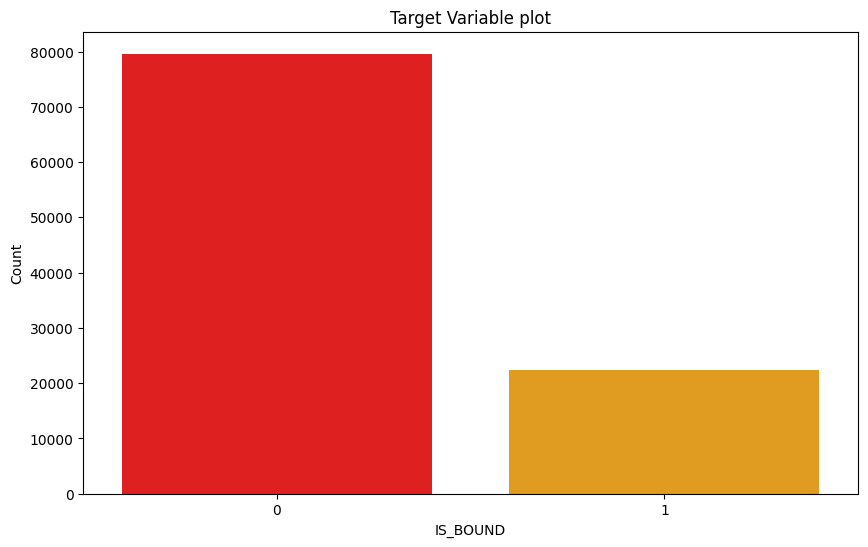

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='IS_BOUND', data=df_train, palette=['Red', 'Orange'])
plt.title('Target Variable plot')
plt.xlabel('IS_BOUND')
plt.ylabel('Count')
plt.show()

Our target variable "IS_BOUND" is imbalanced and this can cause issue during classification so we will tackle this imbalance data problem before model training in fututre

## Pre - Processing on Training dataset

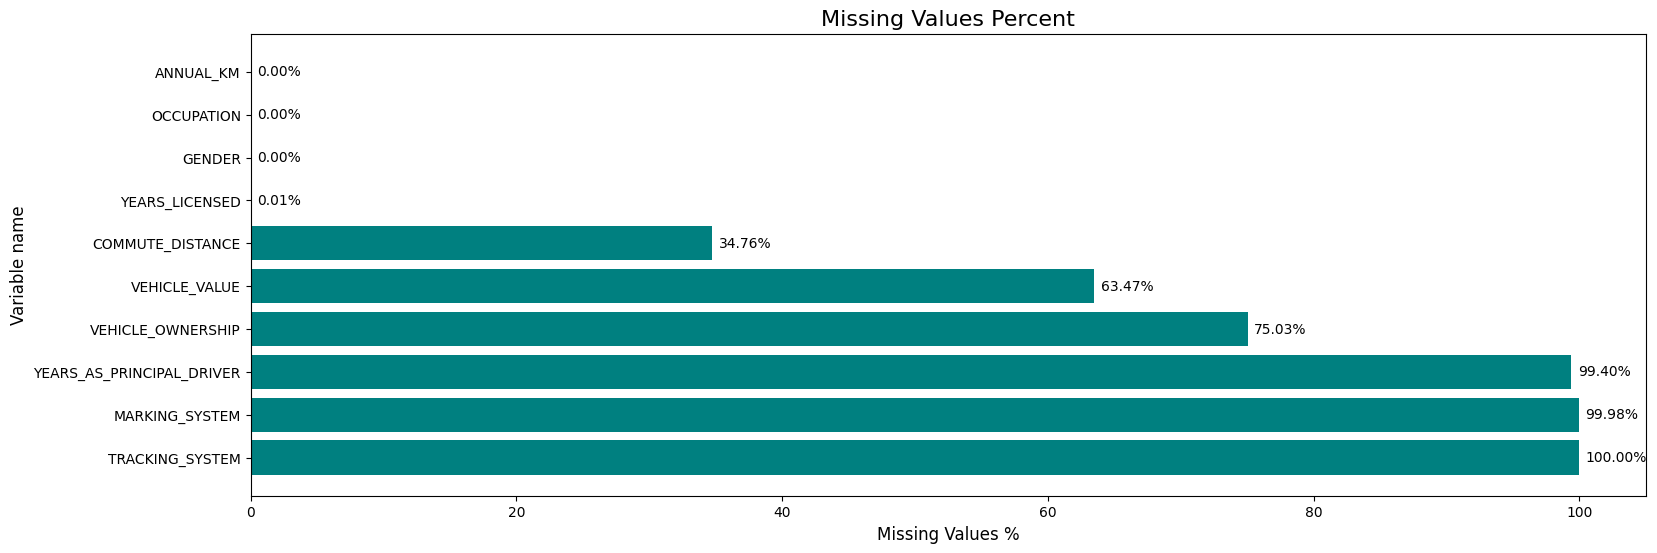

In [ ]:
# Plot to visualize percent of missing values
percent = df_train.isnull().mean() * 100
percent = percent[percent > 0]
percent.sort_values(inplace=True)

# Plotting the missing data percentages
plt.figure(figsize=(18,6))
bars = plt.barh(percent.index, percent.values, color='Teal')
plt.title('Missing Values Percent', fontsize=16)
plt.xlabel('Missing Values %', fontsize=12)
plt.ylabel('Variable name', fontsize=12)
plt.gca().invert_yaxis()
for index, value in enumerate(percent.values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')
plt.show()

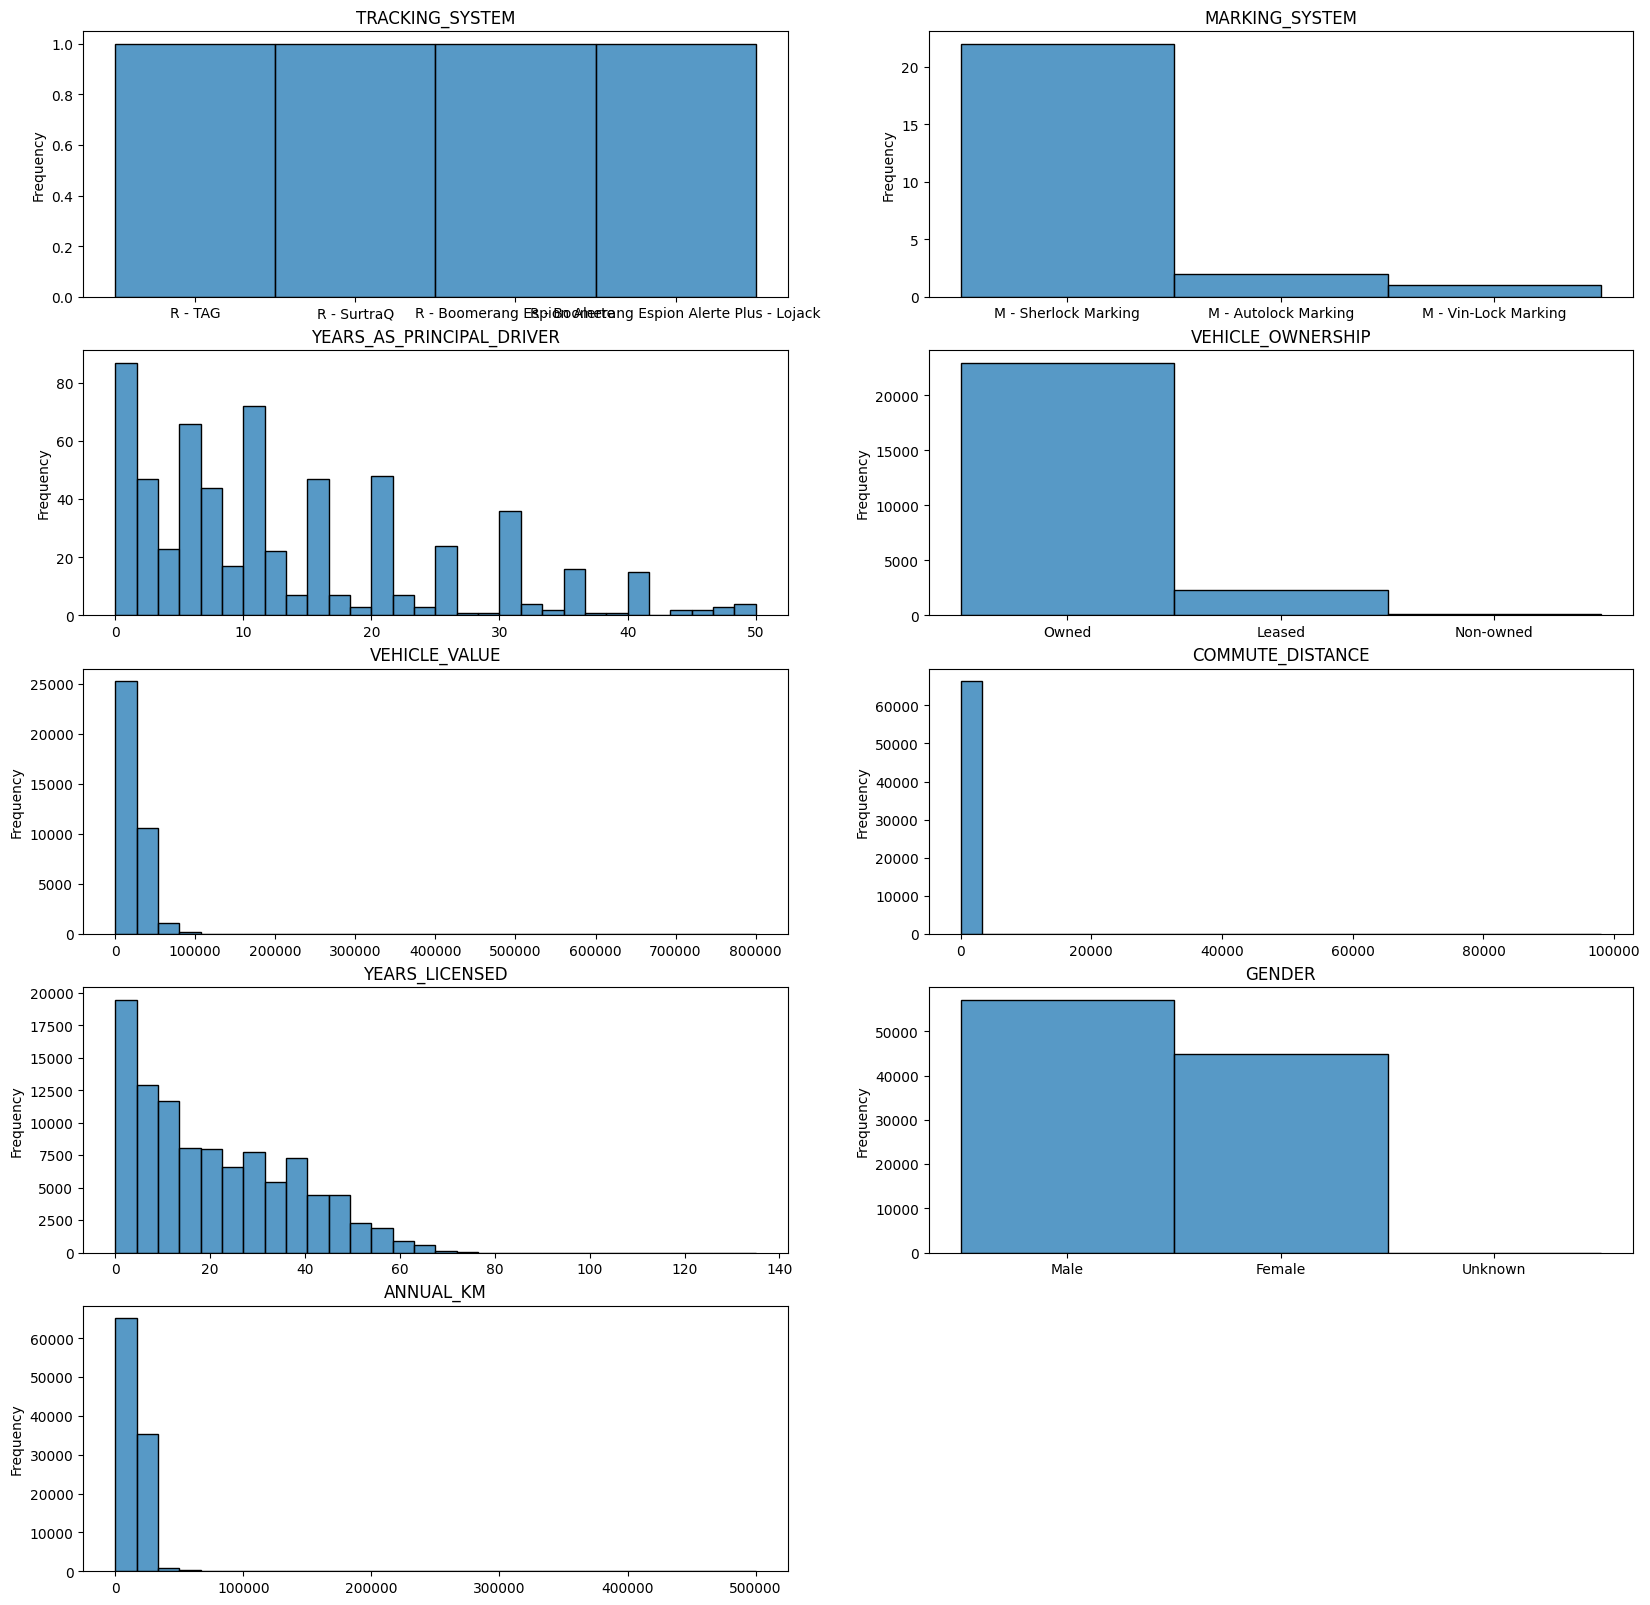

In [ ]:
# Store columns to plot
columns_to_plot = ['TRACKING_SYSTEM',
    'MARKING_SYSTEM', 'YEARS_AS_PRINCIPAL_DRIVER',
    'VEHICLE_OWNERSHIP', 'VEHICLE_VALUE', 'COMMUTE_DISTANCE',
    'YEARS_LICENSED', 'GENDER', 'ANNUAL_KM'
]
plt.figure(figsize=(20, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df_train[column],bins=30)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.show()

Looking at the histograms we can easily figure out that most of our data contains categorical values which we need to deal with, there are some missing values in the dataset as well as most of our data is skewed heavily. We will make decision on null values depending on the column type and its importance ahead.

In [ ]:
# Calculating percent of missing values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(12))

                            Total    Percent
TRACKING_SYSTEM            101887  99.996074
MARKING_SYSTEM             101866  99.975464
YEARS_AS_PRINCIPAL_DRIVER  101279  99.399358
VEHICLE_OWNERSHIP           76450  75.031161
VEHICLE_VALUE               64673  63.472731
COMMUTE_DISTANCE            35413  34.755768
YEARS_LICENSED                  8   0.007852
GENDER                          5   0.004907
ANNUAL_KM                       1   0.000981
OCCUPATION                      1   0.000981
ASSIGNED_LOSSES_PD_5YRS         0   0.000000
SUSPENSION_COUNT                0   0.000000


The missing values in these features might mean this particular feature is not avaialble in that specific car. We can fill them with "**None**" but since they have no real impact on the model performance we will just remove them.

In [ ]:
df_train.drop(['TRACKING_SYSTEM', 'MARKING_SYSTEM'], axis=1, inplace=True)

According to the above missing value percentage table in "YEARS_AS_PRINCIPAL_DRIVER" 99% data is missing and looking at description it does not look it has an other related features so just drop this.

We tried to impute the missing values in "VEHICLE_OWNERSHIP" as Unkown but it had no significant impact on model performance rather removing the column totally improved Test set accuraccy while classification so we will just drop this column too.

In [ ]:
df_train.drop(['YEARS_AS_PRINCIPAL_DRIVER','VEHICLE_OWNERSHIP'], axis=1, inplace=True)

For Gender column there are 5 values missing we can do two things either drop the rows since the dataset is large enough dropping 5 rows wont affect much OR we can impute Unkown in place of null values. We tried both the both methods dropping the rows improved out performace model .

In [ ]:
# Filtering rows where GENDER values are missing
gender = df_train[df_train['GENDER'].isna()]
# Print those rows
gender

,QUOTE_DATE,VEHICLE_YEAR,VEHICLE_MAKE,VEHICLE_MODEL,ANNUAL_KM,COMMUTE_DISTANCE,VEHICLE_VALUE,VEHICLE_USE,GENDER,YEAR_OF_BIRTH,...,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
14254,2016-03-23,2008,HYUNDAI,ELANTRA GL 4DR,5000.0,NaN,40000.0,Pleasure,NaN,9999,...,3.0,Yes,Single,Office/Stores,0,0,0,0,0,0
14651,2016-03-24,2016,TRUCK/VAN,F250 SD LARIAT SUPERCAB 4WD DIESEL,15000.0,10.0,NaN,Commute,NaN,9999,...,6.0,Yes,Married,Labour/Plant,1,0,0,0,0,1
29908,2016-05-06,2005,FORD,FOCUS ZX4 S 4DR,15000.0,10.0,NaN,Commute,NaN,9999,...,0.0,No,Single,Student,0,0,0,0,0,0
87731,2016-10-31,2006,PONTIAC,G6 SE 4DR,12000.0,5.0,NaN,Commute,NaN,9999,...,22.0,Yes,Married,Office/Stores,0,0,0,0,0,0
97039,2016-12-05,2007,TRUCK/VAN,B3000 CAB PLUS 4DR 2WD,20000.0,15.0,20000.0,Commute,NaN,9999,...,0.0,Yes,Single,NaN,0,0,0,0,0,0


In [ ]:
# df['GENDER'].fillna("Unkown", inplace=True)
# Drop rows where GENDER is missing
df_train = df_train.dropna(subset=['GENDER'])

The "ANNUAL_KM" feature indicates the amount of distance that the client drives in a year. As seen in the plot of missing values there is only one missing value in the column

In [ ]:
# Filtering rows where GENDER values are missing
annual_km = df_train[df_train['ANNUAL_KM'].isna()]
# Print the missing rows
annual_km

,QUOTE_DATE,VEHICLE_YEAR,VEHICLE_MAKE,VEHICLE_MODEL,ANNUAL_KM,COMMUTE_DISTANCE,VEHICLE_VALUE,VEHICLE_USE,GENDER,YEAR_OF_BIRTH,...,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
94545,2016-11-23,2012,HONDA,CIVIC LX 4DR,NaN,15.0,NaN,Commute,Female,1965,...,20.0,Yes,Unknown,Not Known,0,0,0,0,0,0


We can clearly see theres another feature called COMMUTE_DISTANCE with value of 15. COMMUTE_DISTANCE and ANNUAL_KM roughly mean the same idea so instead of putting random mean value will we take mean of all Annual_km with Commute distance = 15 from the data and fill it and then drop 'COMMUTE_DISTANCE'.

In [ ]:
# Calculate the average ANNUAL_KM for people with COMMUTE_DISTANCE of 15
mean_annual_km = df_train[df_train['COMMUTE_DISTANCE'] == 15]['ANNUAL_KM'].mean()
# Round the average value
rounded_mean = round(mean_annual_km, -3)
# Fill the missing value in ANNUAL_KM with the rounded average
df_train.loc[df_train['ANNUAL_KM'].isnull(),'ANNUAL_KM'] = rounded_mean

In [ ]:
df_train.drop('COMMUTE_DISTANCE', axis=1, inplace=True)

The "YEARS_LICENSED" column indicates for how many years the client has had license . According to law in Ontario anyone can have license from 16yr old age
keeping in mind this we can look for years licensed rows where the age of client is more than 90 yr assuming 90 yrs old wont drive cars

In [ ]:
# Preview rows where YEARS_LICENSED is greater than 74 (implied age > 90)
rows_to_remove = df_train[df_train['YEARS_LICENSED'] > 74]
# Display the rows that would be excluded
rows_to_remove

,QUOTE_DATE,VEHICLE_YEAR,VEHICLE_MAKE,VEHICLE_MODEL,ANNUAL_KM,VEHICLE_VALUE,VEHICLE_USE,GENDER,YEAR_OF_BIRTH,POSTAL_CODE,...,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
814,2016-01-14,1991,TRUCK/VAN,EXPLORER 2DR 2WD,5000.0,1.0,Pleasure,Male,1922,N8A,...,76.0,No,Widow/Widower,Retired,0,0,0,0,0,0
2084,2016-01-27,2015,TOYOTA,AVALON LIMITED 4DR,15000.0,NaN,Pleasure,Male,1936,L0S,...,80.0,Yes,Married,Not Known,0,0,0,0,0,0
4780,2016-02-16,2008,FORD,FUSION SE V6 4DR,10000.0,NaN,Pleasure,Male,1931,P1B,...,85.0,Yes,Married,Not Known,0,0,0,0,0,0
5498,2016-02-19,2007,TOYOTA,CAMRY SE 4DR,10000.0,NaN,Pleasure,Female,1937,M3K,...,79.0,Yes,Married,Not Known,0,0,0,0,0,0
17159,2016-04-01,2002,BUICK,CENTURY CUSTOM 4DR,5000.0,NaN,Pleasure,Male,1922,C1A,...,75.0,No,Married,Retired,0,0,0,0,0,0
18122,2016-04-07,2003,TRUCK/VAN,ENVOY 4DR 4WD,10000.0,NaN,Pleasure,Female,1947,N7S,...,97.0,Yes,Married,Not Known,0,0,0,0,0,1
18437,2016-04-08,2007,TRUCK/VAN,EXPEDITION EL XLT 4DR 2WD,10000.0,NaN,Pleasure,Male,1925,M6G,...,75.0,No,Single,Not Known,0,0,0,0,0,1
20803,2016-04-13,2015,TRUCK/VAN,ROGUE SL 4DR AWD,20000.0,28000.0,Farm Pleasure,Male,1928,K0A,...,76.0,No,Married,Not Known,0,0,0,0,0,0
23615,2016-04-20,2012,TRUCK/VAN,ESCAPE LIMITED 4DR 2WD,10000.0,NaN,Pleasure,Male,1936,L4T,...,80.0,No,Married,Not Known,0,0,0,0,0,0
23917,2016-04-21,2002,TRUCK/VAN,CARAVAN SPORT,15000.0,25000.0,Pleasure,Male,1925,B4V,...,75.0,Yes,Married,Not Known,0,0,0,0,0,1


We can look there are 39 rows where years_liensed do not make sense so we will just remove them from our dataframe.

In [ ]:
# This will only include rows in df_train where years licensed is less than equal to 74
df_train= df_train[df_train['YEARS_LICENSED'] <= 74]


The "YEARS_LICENSED" column provides information about the number of years the client has license . Typically in ONTARIO we can get license once we turn 16yrs old. We can fill the missing values with the formula : YEARS_LICENSED = QUOTE_YEAR - YEAR_OF_BIRTH - 16.

In [ ]:
# Extracting quote year for pur calculation
# df_train['QUOTE_DATE'] = df_train['QUOTE_DATE'].astype(str)
# df_train['QUOTE_YEAR'] = df_train['QUOTE_DATE'].str.extract(r'(^\d{4})')
# df_train.drop('QUOTE_DATE', axis=1, inplace=True)
# Formula to get years licensed
# df_train['YEAR_OF_BIRTH'] = df_train['YEAR_OF_BIRTH'].astype(int)
# df_train['QUOTE_YEAR'] = df_train['QUOTE_YEAR'].astype(int)
# df_train['YEARS_LICENSED'] = df_train['YEARS_LICENSED'].fillna(df_train['QUOTE_YEAR'] - df_train['YEAR_OF_BIRTH'] - 16)

We tried this way but the model perfromance decreases . If we simply impute mean the model performance is much better so we will just imput mean to fill missing values here.

In [ ]:
# Fill the null values using mean
df_train['YEARS_LICENSED']=df_train['YEARS_LICENSED'].fillna(df_train['YEARS_LICENSED'].mean())

Now again we can look for values that do not make any sense and find out that theres no such problem on our dataset now.

In [ ]:
# Preview rows where YEARS_LICENSED is greater than 74 (implied age > 90)
rows = df_train[df_train['YEARS_LICENSED'] > 74]
# Display the rows that would be excluded
rows

,QUOTE_DATE,VEHICLE_YEAR,VEHICLE_MAKE,VEHICLE_MODEL,ANNUAL_KM,VEHICLE_VALUE,VEHICLE_USE,GENDER,YEAR_OF_BIRTH,POSTAL_CODE,...,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND


There is one more column named "OCCUPATION" which has just 1 missing value since our dataset is much largere removing one row wont affect much .

Additionlly we tried putting "Unknown" at that place but it had no affect on model performance so we will just drop that row.

In [ ]:
# Preview rows where YEARS_LICENSED is greater than 74 (implied age > 90)
row= df_train[df_train['OCCUPATION'].isna()]
# Display the rows that would be excluded
row

,QUOTE_DATE,VEHICLE_YEAR,VEHICLE_MAKE,VEHICLE_MODEL,ANNUAL_KM,VEHICLE_VALUE,VEHICLE_USE,GENDER,YEAR_OF_BIRTH,POSTAL_CODE,...,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND


In [ ]:
# df['OCCUPATION'].fillna("Unkown", inplace=True) In the draft we filed the missing values with Unknown but we were told to drop the missing values
# Drop rows where OCCUPATION is missing
df_train = df_train.dropna(subset=['OCCUPATION'])

## Pre - Processing on Test Dataset

In [ ]:
# Table to visualize missing columns
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum() / df_test.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(12))

                                Total    Percent
TRACKING_SYSTEM                 15112  99.986767
MARKING_SYSTEM                  15095  99.874289
YEARS_AS_PRINCIPAL_DRIVER       14946  98.888448
VEHICLE_OWNERSHIP               11500  76.088395
VEHICLE_VALUE                   10159  67.215826
COMMUTE_DISTANCE                 5191  34.345640
YEARS_LICENSED                      3   0.019849
QUOTE_DATE                          0   0.000000
ASSIGNED_LOSSES_PD_5YRS             0   0.000000
CONVICTION_COUNT_CRIMINAL_3YRS      0   0.000000
CONVICTION_COUNT_MAJOR_3YRS         0   0.000000
CONVICTION_COUNT_MINOR_3YRS         0   0.000000


In [ ]:
# Dropping columns similar to what we did in training dataset
df_test.drop(['TRACKING_SYSTEM', 'MARKING_SYSTEM','YEARS_AS_PRINCIPAL_DRIVER','VEHICLE_OWNERSHIP'], axis=1, inplace=True)

df_test.drop('COMMUTE_DISTANCE', axis=1, inplace=True)

In [ ]:
# Fill the null values using mean similar to what we did training dataset
df_test['YEARS_LICENSED']=df_test['YEARS_LICENSED'].fillna(df_test['YEARS_LICENSED'].mean())

In [ ]:
df_test

,QUOTE_DATE,VEHICLE_YEAR,VEHICLE_MAKE,VEHICLE_MODEL,ANNUAL_KM,VEHICLE_VALUE,VEHICLE_USE,GENDER,YEAR_OF_BIRTH,POSTAL_CODE,AREA_CODE,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT
0,2017-01-03,2002,HONDA,CIVIC EX 2DR COUPE [U.S. MODEL],10000,NaN,Commute,Male,1993,N8H,226,7.0,No,Single,Not Known,0,0,0,0,0
1,2017-01-04,2010,TRUCK/VAN,F150 XLT SUPERCREW 4WD,10000,NaN,Commute,Male,1987,P4N,705,13.0,Yes,Single,Not Known,0,0,0,0,0
2,2017-01-04,2017,TRUCK/VAN,RAM 1500 REBEL CREW CAB 4WD,9000,72000.0,Commute,Male,1967,P2A,705,33.0,Yes,Single,Not Known,0,0,0,0,0
3,2017-01-04,2013,TRUCK/VAN,RAM 1500 SPORT CREW CAB 4WD,10000,55000.0,Commute,Male,1992,Y1A,867,9.0,No,Single,Not Known,0,0,0,0,0
4,2017-01-04,2014,FORD,FOCUS SE 4DR,20000,NaN,Commute,Female,1995,B1V,902,4.0,No,Single,Student,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15109,2017-02-27,2012,HONDA,CIVIC DX 4DR,20000,NaN,Commute,Female,1988,L4H,905,9.0,Yes,Single,Not Known,0,0,0,0,0
15110,2017-02-27,2011,BMW,323i 4DR,10000,12418.0,Commute,Male,1973,N0P,519,27.0,Yes,Married,Not Known,0,0,0,0,0
15111,2017-02-27,2007,TRUCK/VAN,ODYSSEY LX,15000,NaN,Commute,Male,1961,L9B,905,32.0,Yes,Married,Not Known,0,0,0,0,0
15112,2017-02-27,2014,TRUCK/VAN,CRV,12000,35000.0,Commute,Female,1991,P4N,705,9.0,Yes,Single,Not Known,0,0,0,0,0


In [ ]:
# Join both the datasets
df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
df

,QUOTE_DATE,VEHICLE_YEAR,VEHICLE_MAKE,VEHICLE_MODEL,ANNUAL_KM,VEHICLE_VALUE,VEHICLE_USE,GENDER,YEAR_OF_BIRTH,POSTAL_CODE,...,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,3000.0,Pleasure,Male,1975,J7E,...,25.0,No,Married,Trades,0,0,0,0,0,0.0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,1.0,Business,Male,1958,L0R,...,10.0,No,Married,Not Known,0,0,0,0,0,0.0
2,2016-01-02,2015,TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,Pleasure,Male,1960,T5C,...,39.0,No,Single,Not Known,0,0,0,0,0,0.0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,NaN,Commute,Male,1985,L6T,...,3.0,Yes,Single,Not Known,0,0,0,0,0,0.0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,NaN,Commute,Male,1982,L3R,...,2.0,Yes,Single,Not Known,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116948,2017-02-27,2012,HONDA,CIVIC DX 4DR,20000.0,NaN,Commute,Female,1988,L4H,...,9.0,Yes,Single,Not Known,0,0,0,0,0,NaN
116949,2017-02-27,2011,BMW,323i 4DR,10000.0,12418.0,Commute,Male,1973,N0P,...,27.0,Yes,Married,Not Known,0,0,0,0,0,NaN
116950,2017-02-27,2007,TRUCK/VAN,ODYSSEY LX,15000.0,NaN,Commute,Male,1961,L9B,...,32.0,Yes,Married,Not Known,0,0,0,0,0,NaN
116951,2017-02-27,2014,TRUCK/VAN,CRV,12000.0,35000.0,Commute,Female,1991,P4N,...,9.0,Yes,Single,Not Known,0,0,0,0,0,NaN


# Feature Engineering

There's one more column left "VEHICLE_VALUE" with missing values. For this we have to do some feature engineering cause vehicle value depends factors like brand, type of vehicle , size, year model , etc. In our dataset we can create these columns using existing columns of VEHICLE_MAKE which we cleaned at the start.

First we will start creating a new column called "VEHICLE_CLASS" using the "VEHICLE_MAKE" column to differentiate between higher and lower end brands which are very effective to determine price of a vehicle

In [ ]:
# Create a list of luxury brands
luxury_brands = [
    'MERCEDES-BENZ', 'INFINITI', 'BMW', 'PORSCHE', 'LAND ROVER', 'LEXUS',
    'AUDI', 'CADILLAC', 'BENTLEY', 'JAGUAR', 'MASERATI', 'TESLA', 'LAMBORGHINI',
    'ROLLS ROYCE', 'ASTON MARTIN', 'FERRARI', 'MCLAREN', 'ALFA ROMEO', 'MAYBACH'
]
# Function to classify the vehicles
def vehicle_class(brand):
    if brand in luxury_brands:
        return 'Luxury'
    else:
        return 'Regular'
df['VEHICLE_CLASS'] = df['VEHICLE_MAKE'].apply(vehicle_class)

Vehicle values also depends on the year the vehicle was manufactured . So we will create VEHICLE_TYPE from VEHICLE_YEAR column .

In [ ]:
# Function to classify vehicles based on the VEHICLE_YEAR
def vehicle_type(year):
    if year < 1950:
        return 'Vintage'
    elif year < 2000:
        return 'Antique'
    else:
        return 'Modern'
# Applying the function to the VEHICLE_YEAR column
df['VEHICLE_TYPE'] = df['VEHICLE_YEAR'].apply(vehicle_type)

We are going to group vehicles based on their types , class and make . We will calculate the mean for each grooup and use it to fill the missing values in the "VEHICLE_VALUE" column for other vehicles in the same group. This will help us to estimate missing values as accurately as possible.

Any other remaining missing values will be replaced with median.

In [ ]:
# Calculate mean value grouping vehicle type, vehicle class and vehicle make
mean_vehicle_value = df.groupby(['VEHICLE_TYPE','VEHICLE_CLASS','VEHICLE_MAKE'])['VEHICLE_VALUE'].transform('mean')
# Fill missing values in 'VEHICLE_VALUE' using the calculated mean for each group
df['VEHICLE_VALUE'].fillna(mean_vehicle_value, inplace=True)
# Step 2: Fill any remaining NaN values with the overall median of VEHICLE_VALUE
df['VEHICLE_VALUE'].fillna(df['VEHICLE_VALUE'].median(), inplace=True)

VEHICLE_MAKE column contains a lot of unique values so when apply one hot encoding the feature space will increase. So in order to keep the feature space as less as possible we can create multiple new column,


We will create a new feature called VEHICLE_BODY using VEHICLE_MAKE column because the vehicles in our dataset have different bodystyles. This might be prove effective in out model performance so we will extract them in new column.

In [ ]:
# List
bike = [
    'KTM','YAMAHA','HARLEY DAVIDSON', 'SKIDOO'
]
trucks = ['TRUCK/VAN']
tractor = ['INTERNATIONAL']
# Function to classify the vehicles
def vehiclebody(body):
    if body in bike:
        return 'BIKE'
    elif body in tractor:
        return 'TRACTOR'
    elif body in trucks:
        return 'Truck/VAN'
    else:
        return 'CAR'
df['VEHICLE_BODY'] = df['VEHICLE_MAKE'].apply(vehiclebody)

Before applying one hot encoding  we will drop VEHICLE_MODEL column as we have already created a new column called VEHICLE_BODY which does similar work and wont increase the feature space exponentially as VEHICLE_MODEL column will do since it contains a lot of unique values

In [ ]:
df.drop('VEHICLE_MODEL', axis=1, inplace=True)

We can capture important information like Quoteyear, Quotemonth from QUOTE_DATE column and then drop the QUOTE_DATE column.

In [ ]:
# Extracting quote year for pur calculation
df['QUOTE_DATE'] = df['QUOTE_DATE'].astype(str)
df['QUOTE_YEAR'] = df['QUOTE_DATE'].str.extract(r'(^\d{4})')

In [ ]:
# Convert QUOTE_DATE to datetime
df['QUOTE_DATE'] = pd.to_datetime(df['QUOTE_DATE'])
# Extract month in abbreviated format
df['QUOTE_MONTH'] = df['QUOTE_DATE'].dt.strftime('%b')

In [ ]:
df.drop('QUOTE_DATE', axis=1, inplace=True)

The Area Code and Postal Code give similar informations we can drop Area Code since Postal Code actually is related to a specific a address and Area code is related to phone number. Nowadays a person might have differnet area code and different postal code . Since our dataset is about clients and car insurance we think its better to keep Postal code cause it might be related to the clients address and it can prove to be an important feature for prediction unlike Area code.

We can keep Postal Code as it is but when we perform one hot encoding since there are many unique values in postal code our feature space increases to somewhat 1525 columns which is not ideal during feature selection so to avoid this we will split the postal code into 3 ways . Example 'N1G' converted to three columns of N , 1 & G

In [ ]:
# Convert the column into string
df[['POSTAL_CODE']].astype(str)
# Extract the first letter, number, and third letter
df['Postal_Code_char1'] = df['POSTAL_CODE'].str[0]
df['Postal_Code_Number'] = df['POSTAL_CODE'].str[1]
df['Postal_Code_char2'] = df['POSTAL_CODE'].str[2]
# Drop the "POSTAL_CODE" column after splitting
df.drop('POSTAL_CODE', axis=1, inplace=True)
df.drop('AREA_CODE', axis=1, inplace=True)

The features like " VEHICLE_YEAR" and "YEAR_OF_BIRTH" give information like year the vehicle was manufactured and birth year of the clients which can prove to be important features so we will convert them into string datatype before one hot encoding.

NOTE : We tried keeping them as integer type but the model performance decreased so we convert them into str.

In [ ]:
df['VEHICLE_YEAR'] = df['VEHICLE_YEAR'].astype(str)
df['YEAR_OF_BIRTH'] = df['YEAR_OF_BIRTH'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116953 entries, 0 to 116952
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   VEHICLE_YEAR                    116953 non-null  object 
 1   VEHICLE_MAKE                    116953 non-null  object 
 2   ANNUAL_KM                       116953 non-null  float64
 3   VEHICLE_VALUE                   116953 non-null  float64
 4   VEHICLE_USE                     116953 non-null  object 
 5   GENDER                          116953 non-null  object 
 6   YEAR_OF_BIRTH                   116953 non-null  object 
 7   YEARS_LICENSED                  116953 non-null  float64
 8   MULTI_PRODUCT                   116953 non-null  object 
 9   MARITAL_STATUS                  116953 non-null  object 
 10  OCCUPATION                      116953 non-null  object 
 11  CONVICTION_COUNT_MINOR_3YRS     116953 non-null  int64  
 12  CONVICTION_COUNT

# One Hot Encoding and feeature scaling

We know majority of columns in our dataset are object datatype and these cannot be used directly to predict IS_BOUND. We first need to convert them into integer datatype so that our model can understand them. And for this purpose we will use One Hot Encoding to covert them into intger datatype.

**We appled standard scalar on numerical columns but it had no impact on model perfromance during prediciton it gave the same revenue rather it decreased the test set accuracy and my google collab kept crashing during feature selection and optimal threshold selection so we dropped the plan to apply standar scalar.**



In [ ]:
#num_data= list(df.select_dtypes(include=['float64','int64']).columns)
#num_data.remove ('IS_BOUND')
#print(num_data)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df[num_data] = scaler.fit_transform(df[num_data])
#df.head()

In [ ]:
# Extracting Categorical Columns
categorical_data= df.select_dtypes(include=['object']).columns
# Applying one-hot encoding to these categorical columns
df = pd.get_dummies(df, columns=categorical_data)
df

,ANNUAL_KM,VEHICLE_VALUE,YEARS_LICENSED,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND,VEHICLE_YEAR_1930,...,Postal_Code_char2_N,Postal_Code_char2_P,Postal_Code_char2_R,Postal_Code_char2_S,Postal_Code_char2_T,Postal_Code_char2_V,Postal_Code_char2_W,Postal_Code_char2_X,Postal_Code_char2_Y,Postal_Code_char2_Z
0,10000.0,3000.000000,25.0,0,0,0,0,0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
1,20000.0,1.000000,10.0,0,0,0,0,0,0.0,False,...,False,False,True,False,False,False,False,False,False,False
2,15000.0,26472.624136,39.0,0,0,0,0,0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
3,20000.0,16213.611921,3.0,0,0,0,0,0,0.0,False,...,False,False,False,False,True,False,False,False,False,False
4,30000.0,15922.928798,2.0,0,0,0,0,0,0.0,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116948,20000.0,15922.928798,9.0,0,0,0,0,0,NaN,False,...,False,False,False,False,False,False,False,False,False,False
116949,10000.0,12418.000000,27.0,0,0,0,0,0,NaN,False,...,False,True,False,False,False,False,False,False,False,False
116950,15000.0,26472.624136,32.0,0,0,0,0,0,NaN,False,...,False,False,False,False,False,False,False,False,False,False
116951,12000.0,35000.000000,9.0,0,0,0,0,0,NaN,False,...,True,False,False,False,False,False,False,False,False,False


After One Hot encoding we have 400 columns and our data pre processing is complete now.

# Splitting the dataset back into training and testing set

After pre processing we again split our combined dataset into training and testing dataset

In [ ]:
# Splitting the dataset back into training and testing
df_train = df.iloc[:101839]  # First 101886 rows as compared to 101891 rows at start beacuse we removed 5 rows earlier while dealing with missing values in GENDER
df_test = df.iloc[101839:]   # Remaining 15114 rows for df_test
print(f'Training data shape : {df_train.shape}')
print(f'Test data shape : {df_test.shape}')

Training data shape : (101839, 400)
Test data shape : (15114, 400)


# Logistic Regression - Modeling and Model Tuning



Now we are done with all the Data Pre processing and the dataset is ready for feature selection, training and testing.

We will use Lasso (L1) Regularization for feature selection

## Feature Selection

After one hot encoding our dataset now has 400 features. If we use all these features this can lead to overfitting which in turns affects our model performance during prediction . To avoid this we will implement feature selection technique where the algorithm will select the best features based on certain factors nullifying the overfitting problem and give optimal model performance.

We can perform forward feature selection like House Price Prediction project but looking at that we had around 200 features it took us 25mins and here we have double number of features and it will take an hour almost which is not optimal so instead we will use Lasso or L1 regularization. L1 regularization works by adding penalty to the loss function which forces some of models coefficients to shrink to zero . This process helps in reducing overfitting and also helps in selecting the features that have positive impact on our model.

In [ ]:
# Split the training data into X and y
X= df_train.drop('IS_BOUND', axis=1)
Y= df_train['IS_BOUND']

The grid search values were chosen to provide an  efficient, and practical search range for the regularization parameter C. This approach ensures the optimal C is identified, whether it corresponds to strong, moderate, or weak regularization.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, recall_score, precision_recall_curve

#Split the data into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the function for Logistic Regression with L1 regularization
def l1_logistic_regression(X_train, Y_train, X_validation, Y_validation, grid=None):
    # Creating a grid for shrinkage coefficient
    if grid is None:
        grid = 10 ** np.linspace(-2, 2, 100)

    # Define the Logistic Regression model with L1 penalty
    logistic_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=100000)

    # Variables to store coefficients and AUC scores
    coefs = []
    validation_auc = []

    # Iterating over the grid to fit the model with different values of C
    for c in grid:
        # Set each value from the coefficient grid and fit the model
        logistic_model.set_params(C=c)
        logistic_model.fit(X_train, Y_train)

        # Extract the model coefficients
        coefs.append(logistic_model.coef_.ravel())

        # Get prediction probabilities from the model
        predictions = logistic_model.predict_proba(X_validation)[:, 1]

        # Calculate and store the AUC score using the predicted probabilities
        validation_auc.append(roc_auc_score(Y_validation, predictions))

    coefs = np.array(coefs)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    # Plot for Coefficients Shrinkage
    axes[0].plot(grid, coefs)
    axes[0].set_xscale('log')
    axes[0].set_xlabel('Regularization Parameter (C)')
    axes[0].set_ylabel('Coefficients')
    axes[0].set_title("Coefficients Shrinkage vs. C")
    # Plot for Validation AUC
    axes[1].plot(grid, validation_auc, label="Validation AUC")
    best_c = grid[np.argmax(validation_auc)]
    axes[1].axvline(best_c, color='k', linestyle='--', label='Best C value')
    axes[1].set_xscale('log')
    axes[1].set_xlabel('Regularization Parameter (C)')
    axes[1].set_ylabel('AUC')
    axes[1].set_title("Validation AUC vs. C")
    axes[1].legend()
    plt.tight_layout()
    plt.show()
    # Use the best Shrinkage Coefficient value and fit the model with training data
    logistic_model.set_params(C=best_c)
    logistic_model.fit(X_train, Y_train)
    # Getting the features with non-zero coefficients
    non_zero_coeff_features = logistic_model.coef_ != 0
    best_features = np.array(X_train.columns)[non_zero_coeff_features.ravel()]
    return best_c, best_features

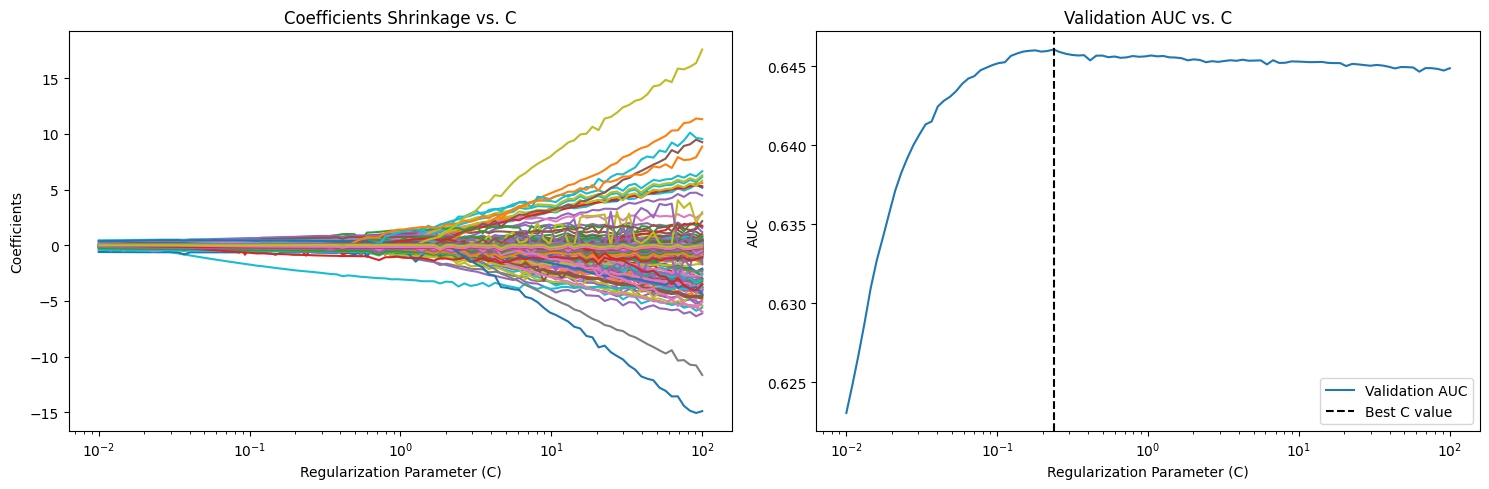

In [ ]:
best_c, best_features = l1_logistic_regression(X_train, Y_train, X_validation, Y_validation)

The first graph shows how the coefficients of the model shrink as the value of C changes which helps us visulaize effect of regularization on the models coefficient.

The second graph displays the AUC score against different values of C, which helps us visualize best c value .

In [ ]:
# Print best features and best C values
print("Best C value:", best_c)
print("Number of features" , len(best_features))
print("Selected features:", best_features)

Best C value: 0.23644894126454083
Number of features 206
Selected features: ['ANNUAL_KM' 'VEHICLE_VALUE' 'YEARS_LICENSED'
 'CONVICTION_COUNT_MINOR_3YRS' 'CONVICTION_COUNT_MAJOR_3YRS'
 'CONVICTION_COUNT_CRIMINAL_3YRS' 'ASSIGNED_LOSSES_PD_5YRS'
 'VEHICLE_YEAR_1983' 'VEHICLE_YEAR_1986' 'VEHICLE_YEAR_1987'
 'VEHICLE_YEAR_1990' 'VEHICLE_YEAR_1991' 'VEHICLE_YEAR_1992'
 'VEHICLE_YEAR_1993' 'VEHICLE_YEAR_1995' 'VEHICLE_YEAR_1998'
 'VEHICLE_YEAR_1999' 'VEHICLE_YEAR_2000' 'VEHICLE_YEAR_2001'
 'VEHICLE_YEAR_2002' 'VEHICLE_YEAR_2003' 'VEHICLE_YEAR_2004'
 'VEHICLE_YEAR_2005' 'VEHICLE_YEAR_2006' 'VEHICLE_YEAR_2007'
 'VEHICLE_YEAR_2008' 'VEHICLE_YEAR_2009' 'VEHICLE_YEAR_2010'
 'VEHICLE_YEAR_2011' 'VEHICLE_YEAR_2012' 'VEHICLE_YEAR_2013'
 'VEHICLE_YEAR_2014' 'VEHICLE_YEAR_2015' 'VEHICLE_YEAR_2016'
 'VEHICLE_YEAR_2017' 'VEHICLE_MAKE_ACURA' 'VEHICLE_MAKE_CADILLAC'
 'VEHICLE_MAKE_CHEVROLET' 'VEHICLE_MAKE_CHRYSLER' 'VEHICLE_MAKE_DODGE'
 'VEHICLE_MAKE_FIAT' 'VEHICLE_MAKE_FORD' 'VEHICLE_MAKE_HONDA'
 'VEHICLE

## Model Training


Now since we have our best features its time to train the logistic model using these best features and then make predictions on Test Data.

But before that lets understand Logistic Regression in detail.

Logistic Regression, is a classification algorithm rather than a regression technique. It is specifically designed for solving binary classification problems where the target variable consists of two distinct classes, such as 0 and 1 in our case. The fundamental principle of Logistic Regression is to model the relationship between input features and the probability of a particular class.

The sigmoid function, used in Logistic Regression, is mathematically defined as:

 \begin{array}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{array}

This function transforms any real number into a value between 0 and 1, making it ideal for converting a linear model's output into probabilities. The sigmoid function takes the linear combination of the input features and their associated coefficients and maps the result into a range that represents a probability score. If the probability exceeds a chosen threshold, typically set at 0.5, the outcome is classified as 1; otherwise, it is classified as 0.

 The sigmoid function  bridges the gap between linear regression, which predicts continuous outputs, and classification tasks that require probabilities for binary outcomes. This capability makes Logistic Regression a practical choice for applications like ours, where the objective is to group data into one of two categories based on specific input features.

Now we will use only best features we selected to train our model

But before we begin training we need to make sure our model is properly tuned to make correct predictions . Remember at the start we had a plot of IS_Bound which was imbalanced we will solve that issue here. We will solve this issue by adjusting class weight and experiment with different thresholds by iterating over different class weights.

*Class weights are used to address class imbalance in a dataset during model training.Class weights help mitigate this issue by assigning higher importance to the minority class.*

But how do we determine whats the best class weight and threshold.

Since we are prediciting will the client buy Insurance based on maximizing advertising revenue we will take the best class weight and threshold value that gives us maximum revenue

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Training data with selected features
X_train_select = X_train[best_features]

# Define a range for class weights and thresholds
class_weight_options = [{0: 1, 1: w} for w in np.linspace(2, 5, 10)]
threshold_options = np.linspace(0.1, 0.9, 10)

# Best parameters initialization
best_revenue = -np.inf
optimal_class_weight = None
optimal_threshold = None

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=3)

# Iterate over each combination of class weights and thresholds
for class_weight in class_weight_options:
    for threshold in threshold_options:
        revenues = []

        # Cross-validation
        for train_index, val_index in skf.split(X_train_select, Y_train):
            # Use .iloc to select rows based on integer indices
            X_train_fold, X_val_fold = X_train_select.iloc[train_index], X_train_select.iloc[val_index]
            Y_train_fold, Y_val_fold = Y_train.iloc[train_index], Y_train.iloc[val_index]
            # Train the model
            model = LogisticRegression(C=best_c, class_weight=class_weight, solver='liblinear', max_iter=1000)
            model.fit(X_train_fold, Y_train_fold)

            # Predict probabilities and apply threshold
            y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
            y_pred = (y_pred_proba >= threshold).astype(int)

            # Calculate revenue
            TN, FP, FN, TP = confusion_matrix(Y_val_fold, y_pred).ravel()
            revenue = 5.50 * TP - 1 * (TP + FP)
            revenues.append(revenue)

        # Calculate average revenue for this combination
        avg_revenue = np.mean(revenues)

        # Update best parameters if current combination is better
        if avg_revenue > best_revenue:
            best_revenue = avg_revenue
            optimal_class_weight = class_weight
            optimal_threshold = threshold
            best_model = model
# Print the best parameters and revenue
print(f'Best Class Weight: {optimal_class_weight}')
print(f'Best Threshold: {optimal_threshold}')
print(f'Best Average Revenue: {best_revenue}')

Best Class Weight: {0: 1, 1: 3.6666666666666665}
Best Threshold: 0.4555555555555556
Best Average Revenue: 8518.333333333334


## Evaluate Performance of our Model

In [ ]:
# selecting the important features on validation set (essentially the features that the model was trained upon)
X_validation_select = X_validation[best_features]
# Predicting the probabilities
y_pred_prob = best_model.predict_proba(X_validation_select)[:, 1]
# Making Predictions with the optimal threshold
y_pred = (y_pred_prob >= optimal_threshold).astype(int)
# Generating a new confusion matrix
conf_matrix = confusion_matrix(Y_validation, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()
# Calculating Accuracy, Precision, Recall, and F1 Score with the new threshold
logistic_accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
logistic_precision = TP / (TP + FP) if (TP + FP) != 0 else 0
logistic_recall = TP / (TP + FN) if (TP + FN) != 0 else 0
logistic_f1_score = 2 * (logistic_precision * logistic_recall) / (logistic_precision + logistic_recall) if (logistic_precision + logistic_recall) != 0 else 0
# Calculating ROC-AUC
logistic_auc = roc_auc_score(Y_validation, y_pred_prob)
# # Print the results
print(f'Accuracy on validation set : {logistic_accuracy}')
print(f'Precision : {logistic_precision}')
print(f'Recall : {logistic_recall}')
print(f'F1-score : {logistic_f1_score}')
print(f'AUC on validation set: {logistic_auc}')

Accuracy on validation set : 51.83621366849961
Precision : 0.2754300985468515
Recall : 0.7441335740072202
F1-score : 0.4020480312080946
AUC on validation set: 0.6419365058949698


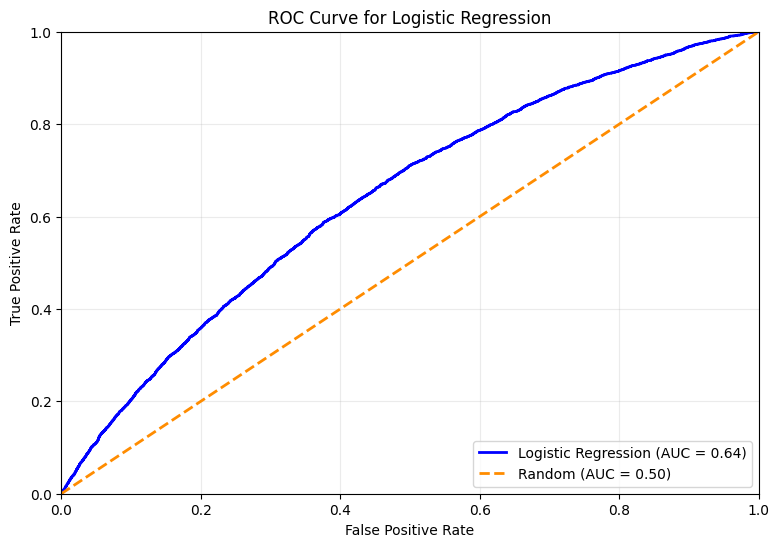

In [ ]:
# Calculating ROC curve using probabilities instead of binary predictions
FPR, TPR, thresholds = roc_curve(Y_validation, y_pred_prob)

# Calculate AUC (Area under the ROC Curve)
auc = roc_auc_score(Y_validation, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(9, 6))
plt.plot(FPR, TPR, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--', label='Random (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid(alpha=0.25)
plt.show()


## Train the Logistic Regression Model on full Training data

Now we will train our Logistic Regression model on full training data
with best class weight and the best features selected during L1 regularization.

We could use Lasso for both feature selection and classification but i decided to go with logistic regression for classification because separating Lasso and Logistic Regression avoids the risk of double penalty, which could cause underfitting and also Logistic Regression can handle correlated features better after Lasso.

In [ ]:
# Define class weights
class_weights = {
    0: 1,
    1:3.7 # Higher weight to the minority class
}
# Initialize the logistic regression model with class weights
model = LogisticRegression(C=best_c, class_weight=class_weights, solver='liblinear', max_iter=1000)

# Fit the model using full data with the selected features
X_select = X[best_features] # Training data with selected features
model.fit(X_select, Y)

LogisticRegression(C=0.23644894126454083, class_weight={0: 1, 1: 3.7},
                   max_iter=1000, solver='liblinear')

## Predict on Test dataset

Now we use the final model to predict on unseen test data using best features selected from L1 Lasso Regularization (Number of Features = 206)



In [ ]:
x = df_test.drop('IS_BOUND', axis=1)
X = df_test[best_features]

y_test_pred_prob = model.predict_proba(X)[:, 1]
# Use the Threshold value determined above to classify the Labels
y_test_pred_custom = (y_test_pred_prob >= 0.46).astype(int)
# Convert predictions to a list
list_predictions = y_test_pred_custom.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
# Output predictions
print(rounded_list_predictions)

[0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 

## Leaderboard Stats


\begin{array}{|c|c|} \hline
Classification Method & Test Set Accuracy & False Negative Rate &  False Positive Rate & Advertising Revenue  \\ \hline
Logistic  Regression & 56 & 36 & 44 & 15 \\\hline
\end{array}

# RANDOM FOREST - Modelling and Model Tuning

A **Random Forest** is an ensemble learning method that builds multiple decision trees during training and then combines their predictions. Each tree is trained on a random subset of the data. For classification, it uses majority voting to improve accuracy and reduce overfitting.

We are using Random Forest to predict whether a person who requested an insurance quote (IS_BOUND) actually took out the policy (IS_BOUND=1) or not (IS_BOUND=0). Each decision tree in the Random Forest analyzes different patterns in the data, such as the vehicle's make, model, or year, the customer's commute distance, marital status, multi-product discounts, or past traffic convictions. For example, one tree might focus on vehicle-related attributes like value and ownership, while another might emphasize the customer's driving history or previous insurance claims. When predicting for a new customer, each tree votes on whether the customer is likely to buy the policy. The final prediction is determined by majority voting among the trees.


## Baseline Random Forest Fitting

In [ ]:
# Split the training data into X and y
X= df_train.drop('IS_BOUND', axis=1)
y = df_train['IS_BOUND']

The Baseline Random Forest model is trained on all the features of the dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split data with important features into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a new RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=5, min_samples_leaf=1, max_depth=10)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7824037706205813


## Feature selection using Feature importance

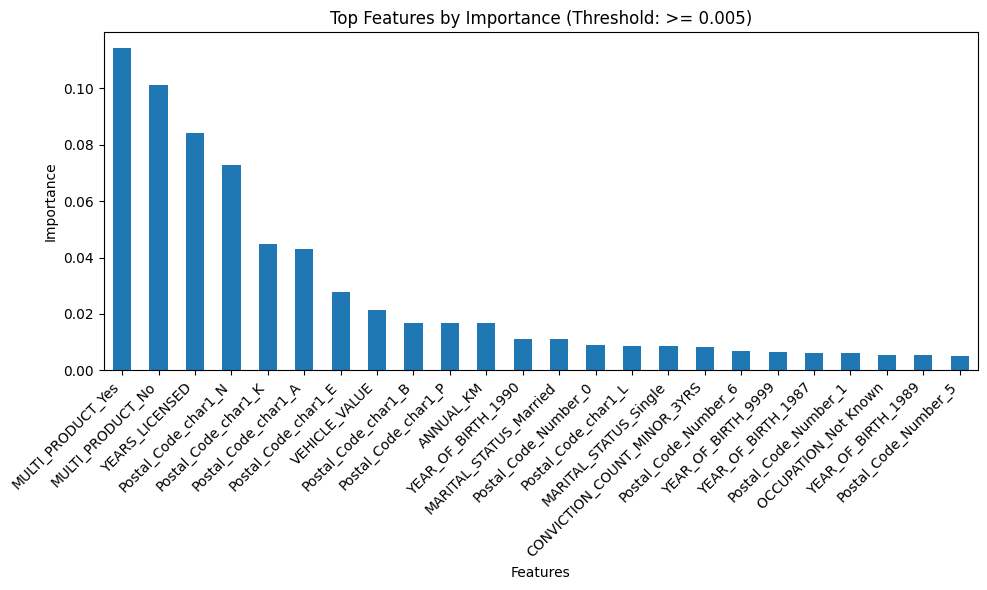

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Set a threshold to filter features
threshold = 0.005

# Filter features above threshold
importances = importances[importances >= threshold]

# Sort the importances in descending order
importances = importances.sort_values(ascending=False)

# Create figure
plt.figure(figsize=(10, 6))

# Create bar plot
importances.plot(kind='bar')

# Add labels and title
plt.title(f'Top Features by Importance (Threshold: >= {threshold})')
plt.xlabel('Features')
plt.ylabel('Importance')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


These are the top features ranked by their feature importance for our model. Threshold is set to 0.005 meaning that only the features with an importance score equal to or greater than 0.005 are shown.

## Random Forest with Parameter Tuning

Now, we train a separate random forest model using only the selected features based on their importance.

In [ ]:
#rom sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

best_features = importances.index

X_important = X[best_features]

# Split data with important features into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Initialize a new RandomForestClassifier
rf2_model = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=5, min_samples_leaf=1, max_depth=10)

# Train the model on the training data
rf2_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf2_model.predict(X_test)

In [ ]:
print("Best Features:")
print(best_features)


Best Features:
Index(['MULTI_PRODUCT_Yes', 'MULTI_PRODUCT_No', 'YEARS_LICENSED',
       'Postal_Code_char1_N', 'Postal_Code_char1_K', 'Postal_Code_char1_A',
       'Postal_Code_char1_E', 'VEHICLE_VALUE', 'Postal_Code_char1_B',
       'Postal_Code_char1_P', 'ANNUAL_KM', 'YEAR_OF_BIRTH_1990',
       'MARITAL_STATUS_Married', 'Postal_Code_Number_0', 'Postal_Code_char1_L',
       'MARITAL_STATUS_Single', 'CONVICTION_COUNT_MINOR_3YRS',
       'Postal_Code_Number_6', 'YEAR_OF_BIRTH_9999', 'YEAR_OF_BIRTH_1987',
       'Postal_Code_Number_1', 'OCCUPATION_Not Known', 'YEAR_OF_BIRTH_1989',
       'Postal_Code_Number_5'],
      dtype='object')


Now, let's compare the differences in the cross-validation scores between our baseline model and the model that uses only the important features.

In [ ]:
from sklearn.model_selection import cross_val_score

# Original model performance
scores_original = cross_val_score(rf_model, X, y, cv=5)

# New model performance with important features only
scores_important = cross_val_score(rf2_model, X_important, y, cv=5)

print("Baseline Fit model CV scores:", scores_original.mean(), "±", scores_original.std())
print("Important features model CV scores:", scores_important.mean(), "±", scores_important.std())

Baseline Fit model CV scores: 0.7812233033651813 ± 4.2966474848693535e-06
Important features model CV scores: 0.7812233033651813 ± 5.3954009561284075e-05


This shows that there was a slight impact because of feature selection.

### Parameter Tuning

We aim to fine-tune our parameters to maximize model performance while minimizing overfitting. For this we are going to perform parameter tuning using Randomized Search Cross Validation.

Parameters in Random Forest:

**n_estimators**: The number of trees in forest. More trees improve stability but increase computation time.  

**max_depth**: Number of features to consider when looking for best split.

**min_samples_split**: The minimum samples needed to split a node. Higher values make trees simpler and less likely to overfit.  

**min_samples_leaf**: The minimum number of samples in newly created leaves.

**max_features**: Limits the number of features considered for each split. Smaller values increase randomness and generalization.

**random_state**: Sets a fixed seed for reproducibility of results.  

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf2_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best score: 0.7810141028952012


Instead of testing all possible combinations, it selects a fixed number (n_iter=10) of random combinations. For each selected combination, the model is evaluated using cross-validation (cv=5), where the data is split into 5 parts, and the model is trained and validated on different splits. The deciding factor here is accuracy. Based on accuracy the best parameters and best score are decided.     

In [ ]:
# Use the best model for prediction
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)


Accuracy: 0.7824037706205813


#### **Thresholding**

The threshold determines the cutoff for classifying predictions as **Positive** (ISBOUND = 1) or **Negative** (ISBOUND = 0).

Using the formula - **`Revenue=(5.5×TP)−(1×(TP+FP))`** we calculate the revenues at different thresholds.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict probabilities for the positive class
y_probs = best_rf_model.predict_proba(X_test)[:, 1]

# Define a range of thresholds
thresholds = np.arange(0.0, 1.0, 0.01)
false_positive_rates = []
false_negative_rates = []
revenues = []

# Calculate FPR, FNR, and revenue for each threshold
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)

    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test[:len(y_pred)], y_pred).ravel()

    # Calculate false positive rate and false negative rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

    # Append FPR and FNR to lists
    false_positive_rates.append(fpr)
    false_negative_rates.append(fnr)

    # Calculate revenue: (5.5 * True Positives) - (1 * Predicted Positives)
    revenue = (5.5 * tp) - (1 * (tp + fp))
    revenues.append(revenue)

**Finding the Best Threshold Value**

Finding the best threshold in a random forest model is important because it helps balance the trade-off between false positives (FP) and false negatives (FN). The goal is to choose a threshold where the model makes the best decisions in order to maximize revenue.

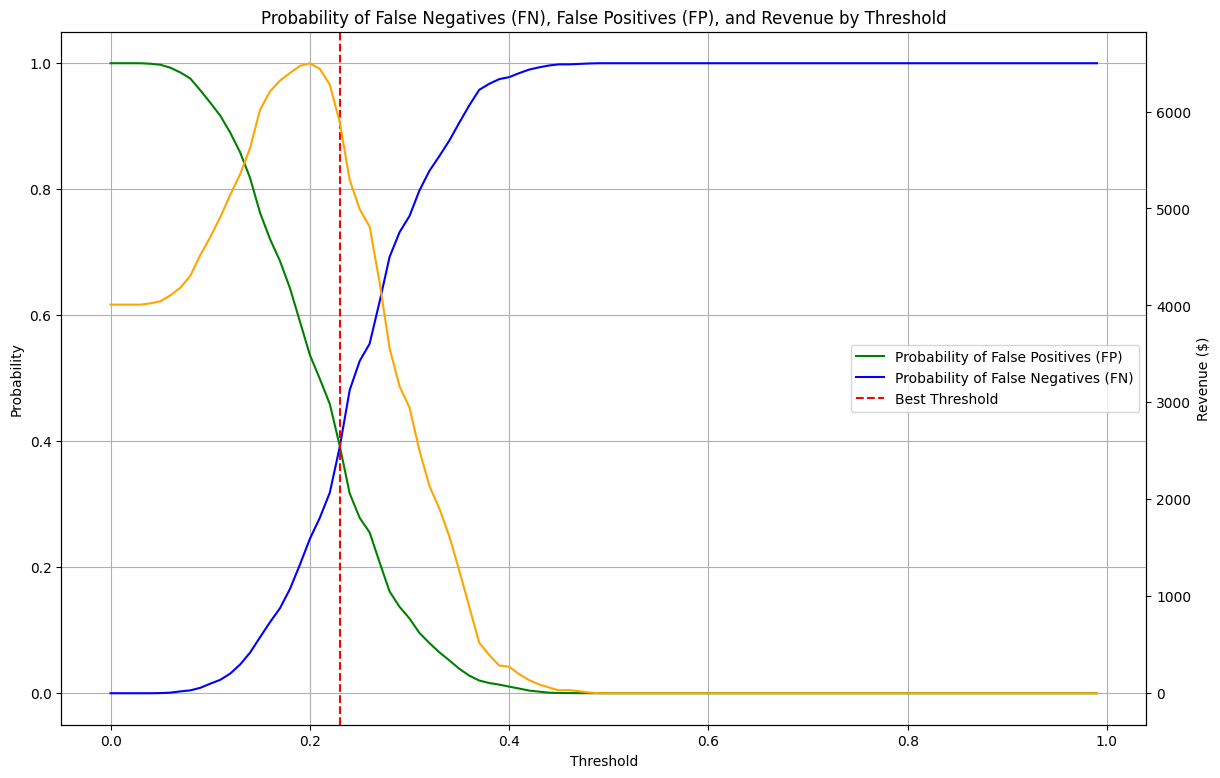

Best Threshold: 0.23


In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(14, 9))  # Wider horizontal size, keeping the same height

# Plot false positive and false negative rates
ax1.plot(thresholds, false_positive_rates, label="Probability of False Positives (FP)", color="green")
ax1.plot(thresholds, false_negative_rates, label="Probability of False Negatives (FN)", color="blue")
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Probability")
ax1.set_title("Probability of False Negatives (FN), False Positives (FP), and Revenue by Threshold")
ax1.grid()
ax1.legend(loc="center right")

# Plot revenue on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(thresholds, revenues, label="Revenue", color="orange")
ax2.set_ylabel("Revenue ($)")
ax1.legend(loc="upper right")

# Mark the point where FP and FN rates intersect
best_threshold = thresholds[np.argmin(np.abs(np.array(false_positive_rates) - np.array(false_negative_rates)))]
ax1.axvline(best_threshold, color="red", linestyle="--", label="Best Threshold")
ax1.legend(loc="center right")

plt.show()

print(f"Best Threshold: {best_threshold}")

We can observe that as the threshold increases, False Positive Rate decreases, while the False Negative Rate increases. The Best Threshold Value represent the threshold value at which the Revenue is Maximized while the False Positive and False Negative Rate are comparitively lower, that is the point where the False Positive and the False Negative Values intersect. Therefore, We conclude that our Best Threshold Value is `0.23`

### **ROC Curve for Tuned Model**

Random Forest AUC: 0.6516709748515723


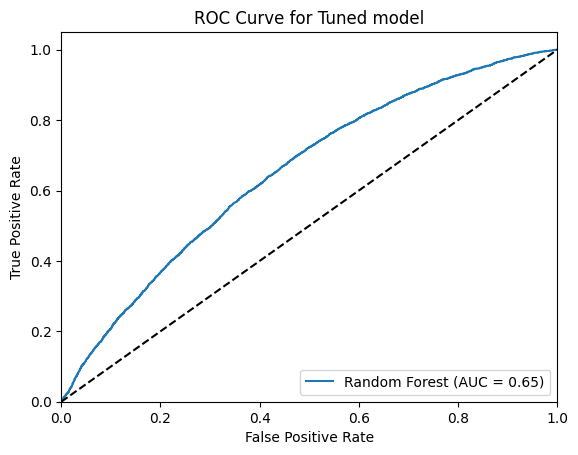

In [ ]:
# Calculate ROC curve and AUC
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
rf_roc_auc = roc_auc_score(y_test, y_pred_proba)

random_auc = roc_auc_score(y_test, y_pred_proba)
print("Random Forest AUC:", random_auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned model')
plt.legend(loc="lower right")
plt.show()

In the above ROC curve, the  dash line represents the performance of a random classifier. It has AUC value 0.5. The blue curve shows the Random Forest model's performance. It has AUC value 0.65. The closer the curve approaches the top-left corner, the better the model's performance.

## Prediction on Test data

In [ ]:
# Get probabilities for the positive class (ISBOUND=1)
test = df_test.drop(columns=['IS_BOUND'])
test = test[best_features]
probabilities = best_rf_model.predict_proba(test)[:, 1]

# Apply the EEP threshold
predictions = (probabilities >= best_threshold).astype(int)

# Convert predictions to a list
list_predictions = predictions.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]

# Output predictions
print(rounded_list_predictions)


[1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 

**Leaderboard Stats**



\begin{array}{|c|c|} \hline
Classification Method & Test Set Accuracy & False Negative Rate &  False Positive Rate & Advertising Revenue  \\ \hline
Random Forest & 59 & 39 & 40 & 16 \\\hline
\end{array}

We were able to achieve a test set accuracy of 59% using our Best Random Forest classification model. The model demonstrated a false negative rate of 39% and a false positive rate of 40%. We were able to rake in an advertising revenue of 16 cents per person.

# Comparing Both The Models

## Based on Metrics



In [ ]:
# Calculate metrics for Logistic Regression
# Print the results for comparison
print("Performance Metrics Comparison:")
print("====================================")
print(f"Logistic Regression:")
print(f'Accuracy on validation set: {logistic_accuracy}')
print(f'Recall : {logistic_recall}')
print(f'F1-score : {logistic_f1_score}')
print(f'AUC on validation set: {logistic_auc}')


# Calculate metrics for Random Forest
rf_predictions = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

#As recall and f1 were showing zero we had to adjust the threshold
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
brf_predictions = (y_pred_proba >= best_threshold).astype(int)
rf_recall = recall_score(y_test, brf_predictions)
rf_f1 = f1_score(y_test, brf_predictions)



# Print the results for comparison
print("Performance Metrics Comparison:")
print("====================================")
print(f"Random Forest:")
print(f"  - Accuracy: {rf_accuracy:.2f}")
print(f"  - Recall: {rf_recall:.2f}")
print(f"  - F1-score: {rf_f1:.2f}")
print("Random Forest AUC:", random_auc)


Performance Metrics Comparison:
Logistic Regression:
Accuracy on validation set: 51.83621366849961
Recall : 0.7441335740072202
F1-score : 0.4020480312080946
AUC on validation set: 0.6419365058949698
Performance Metrics Comparison:
Random Forest:
  - Accuracy: 0.78
  - Recall: 0.61
  - F1-score: 0.40
Random Forest AUC: 0.6516709748515723


Based on the metrics provided, *Random Forest is better* because it achieves a significantly higher *accuracy (78%)* and a better *AUC (0.65)* compared to Logistic Regression's accuracy (51%) and AUC (0.64). These metrics indicate that Random Forest has a stronger overall ability to classify correctly and distinguish between classes. While its recall is zero, the high accuracy and AUC demonstrate that Random Forest performs better when the focus is on overall correct classification and distinguishing between categories, making it the superior choice in this comparison.


## ROC Curve

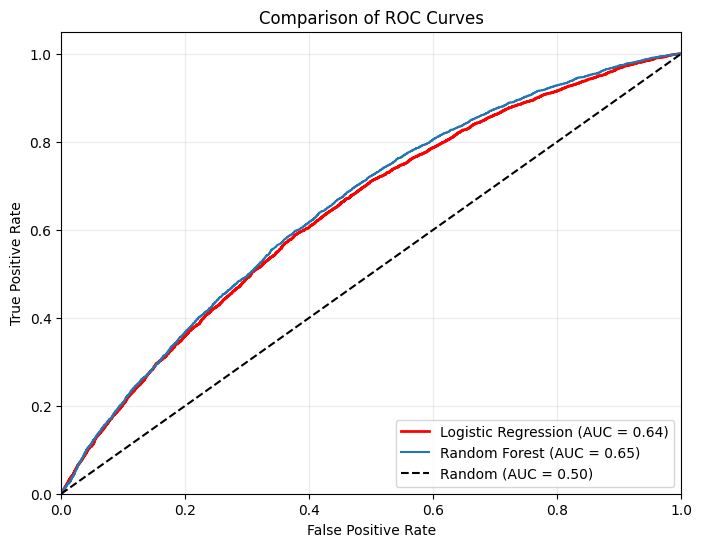

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# First ROC curve (from Logistic Regression)
FPR, TPR, thresholds = roc_curve(Y_validation, y_pred_prob)
auc = roc_auc_score(Y_validation, y_pred_prob)
# Second ROC curve (from Random Forest)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
rf_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot both ROC curves together
plt.figure(figsize=(8, 6))

# Plot Logistic Regression ROC curve
plt.plot(FPR, TPR, color='red', lw=2, label=f'Logistic Regression (AUC = {auc:.2f})')

# Plot Random Forest ROC curve
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')

# Plot Chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

# Set limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend(loc="lower right")
plt.grid(alpha=0.25)

# Show plot
plt.show()


The ROC curves are graphical representation that help in predicting tagert variable "IS_BOUND".These ROC curves are for our two predictive models Logistic Regression and Random Forest. The ROC curve for Logistic Regression, with an AUC of 0.64, suggests that it struggles somewhat to differentiate between the outcomes compared to the Random Forest model, which has a higher AUC of 0.65. A higher AUC typically indicates a better-performing model.

The Random Forest model’s curve reflects more consistent performance, with a gradual rise toward the top-left corner of the graph. This indicates its improved ability to maintain a balance between true positives and false positives. On the other hand, while the Logistic Regression model has a lower AUC, its curve still shows that it can perform reasonably well at specific thresholds.

Interestingly, even though Random Forest demonstrates better overall performance (as seen by its higher AUC).Since our focus is on maximizing revenue, Logistic Regression might still prove advantageous depending on how its true positive rate translates to actionable outcomes at key thresholds.The shapes of the ROC curves give us clues about this balance: while the Random Forest model's curve shows it's generally more accurate, the Logistic Regression's curve shows that at the right spot, it's more profitable. The peak in the Logistic Regression ROC curve represents the most effective trade-off between the true positive rate and the false positive rate achieved by the model for a particular threshold.

## Leader Board Scores Comparison



\begin{array}{|c|c|} \hline
Classification Methods & Test Set Accuracy & False Negative Rate &  False Positive Rate & Advertising Revenue  \\ \hline
Logistic Regression & 56 & 36 & 44 & 15 \\ \hline
Random Forest & 59 & 39 & 40 & 16 \\\hline
\end{array}


Random Forest has a higher test accuracy (59%) compared to Logistic Regression (56%), meaning it predicts better overall. However, Random Forest has a higher false negative rate (39%) than Logistic Regression (36%), meaning it misses more true positive cases. On the other hand, it has a lower false positive rate (40%) compared to Logistic Regression (44%), meaning it makes fewer incorrect positive predictions. Random Forest also outperforms in generating advertising revenue (16 vs. 15). Overall, Random Forest outperforms Logistic Regression making it the better choice despite its higher false negative rate.